# BASEBALL CASE STUDY

## Important Libraries imported

In [1]:
# Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### Data Description

#### Baseball Case Study

Problem Statement:
    
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)


1. Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)


2. R:-  Runs scored: number of times a player crosses home plate

3. AB:-  At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction

4. H:-  Hit: reaching base because of a batted, fair ball without error by the defense

5. 2B:- Double: hits on which the batter reaches second base safely without the contribution of a fielding error

6. 3B:- Triple: hits on which the batter reaches third base safely without the contribution of a fielding error

7. HR:- Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error

8. BB:-  Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.

9. SO:- Strikeout: number of batters who received strike three

10. SB:– Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense

11. RA:- Run average: number of runs allowed times nine divided by innings pitched

12. ER: Earned run: number of runs that did not occur as a result of errors or passed balls

13. ERA:- Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

14. CG:- Complete game: number of games where player was the only pitcher for their team

15. SHO:- Shutout: number of complete games pitched with no runs allowed

16. SV:- Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

17. E:- Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

--------------------------------------------------------------------------
18. TB:- Total bases: one for each single, two for each double, three for each triple, and four for each home run
 TB: [H + 2B + (2 × 3B) + (3 × HR)] 

In [2]:
# https://en.wikipedia.org/wiki/Baseball_statistics

### Import Dataset

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/Bhushan0130/Datasets/main/baseball.csv')  # dataset link
data.shape # shape

# (30, 17)

(30, 17)

In [4]:
pd.set_option('display.max_rows', None)  # to maximize the rows
pd.set_option('display.max_columns', None)  # to maximize the columns

In [5]:
data.head()  # top 5 rows

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

In [6]:
# As we can see imported data columns name are in Short form, need to covert them into full form
# for more understanding

## Data Preprocessing

#### Creating New Columns

In [7]:
# As information received from wikipedia
# We can create TB (Total base) and XBH (XBH) column to give more information to the model for best fit

In [8]:
# TB = [H + 2B + (2 × 3B) + (3 × HR)] 
# XBH = (2B + 3B + HR)

In [9]:
data['TB'] = data['H'] + data['2B'] + (2*data['3B'] + (3*data['HR']))  # For TB Column creation

In [10]:
data['XBH'] = data['2B'] + data['3B'] + data['HR']              # For XBH Column creation

In [11]:
data.head()  # Top 5 rows of dataset

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E    TB  XBH  
0  56   88  2298  481  
1  45   86  2182  477  
2  38   79  2179  473  
3  37  101  2103  423  
4  35   86  2355  489

In [12]:
data.shape   # data shape 
# (30, 19)

(30, 19)

#### Creating DataFrame with updated proper column names

In [13]:
col = ['Win', 'Run_scored', 'At_bat', 'Hit', 'Double', 'Triple', 'Home_runs', 'Base_on_balls', 'Strikeout', 'Stolen_base', 'Run_average', 'Earned_run', 'Earned_run_average', 'Complete_game', 'Shutout', 'Save','Errors', 'Table_bases', 'Extra_base_hits']
len(col)

# these column names are found from wikipedia information about given dataset
# 19

19

In [14]:
df = pd.DataFrame(data.values, columns = col)  # creating new dataframe to get full name of the columns

In [15]:
df.shape

# (30, 19)

(30, 19)

In [16]:
df.head(4)  #  4 random rows

Win  Run_scored  At_bat     Hit  Double  Triple  Home_runs  Base_on_balls  \
0  95.0       724.0  5575.0  1497.0   300.0    42.0      139.0          383.0   
1  83.0       696.0  5467.0  1349.0   277.0    44.0      156.0          439.0   
2  81.0       669.0  5439.0  1395.0   303.0    29.0      141.0          533.0   
3  76.0       622.0  5533.0  1381.0   260.0    27.0      136.0          404.0   

   Strikeout  Stolen_base  Run_average  Earned_run  Earned_run_average  \
0      973.0        104.0        641.0       601.0                3.73   
1     1264.0         70.0        700.0       653.0                4.07   
2     1157.0         86.0        640.0       584.0                3.67   
3     1231.0         68.0        701.0       643.0                3.98   

   Complete_game  Shutout  Save  Errors  Table_bases  Extra_base_hits  
0            2.0      8.0  56.0    88.0       2298.0            481.0  
1            2.0     12.0  45.0    86.0       2182.0            477.0  
2           11.0     10.0  38.0    79.0       2179.0            473.0  
3            7.0      9.0  37.0   101.0       2103.0            423.0

In [17]:
df.tail()  # botton 5 rows

Win  Run_scored  At_bat     Hit  Double  Triple  Home_runs  \
25  92.0       667.0  5385.0  1346.0   263.0    26.0      187.0   
26  84.0       696.0  5565.0  1486.0   288.0    39.0      136.0   
27  79.0       720.0  5649.0  1494.0   289.0    48.0      154.0   
28  74.0       650.0  5457.0  1324.0   260.0    36.0      148.0   
29  68.0       737.0  5572.0  1479.0   274.0    49.0      186.0   

    Base_on_balls  Strikeout  Stolen_base  Run_average  Earned_run  \
25          563.0     1258.0         59.0        595.0       553.0   
26          457.0     1159.0         93.0        627.0       597.0   
27          490.0     1312.0        132.0        713.0       659.0   
28          426.0     1327.0         82.0        731.0       655.0   
29          388.0     1283.0         97.0        844.0       799.0   

    Earned_run_average  Complete_game  Shutout  Save  Errors  Table_bases  \
25                3.44            6.0     21.0  47.0    75.0       2222.0   
26                3.72            7.0     18.0  41.0    78.0       2260.0   
27                4.04            1.0     12.0  44.0    86.0       2341.0   
28                4.09            1.0      6.0  41.0    92.0       2100.0   
29                5.04            4.0      4.0  36.0    95.0       2409.0   

    Extra_base_hits  
25            476.0  
26            463.0  
27            491.0  
28            444.0  
29            509.0

## Information about dataset

In [18]:
df.info()
#   Column              Non-Null Count  Dtype  
# ---  ------              --------------  -----  
#  0   Win                 30 non-null     float64
#  1   Run_scored          30 non-null     float64
#  2   At_bat              30 non-null     float64
#  3   Hit                 30 non-null     float64
#  4   Double              30 non-null     float64
#  5   Triple              30 non-null     float64
#  6   Home_runs           30 non-null     float64
#  7   Base_on_balls       30 non-null     float64
#  8   Strikeout           30 non-null     float64
#  9   Stolen_base         30 non-null     float64
#  10  Run_average         30 non-null     float64
#  11  Earned_run          30 non-null     float64
#  12  Earned_run_average  30 non-null     float64
#  13  Complete_game       30 non-null     float64
#  14  Shutout             30 non-null     float64
#  15  Save                30 non-null     float64
#  16  Errors              30 non-null     float64
#  17  Table_bases         30 non-null     float64
#  18  Extra_base_hits     30 non-null     float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Win                 30 non-null     float64
 1   Run_scored          30 non-null     float64
 2   At_bat              30 non-null     float64
 3   Hit                 30 non-null     float64
 4   Double              30 non-null     float64
 5   Triple              30 non-null     float64
 6   Home_runs           30 non-null     float64
 7   Base_on_balls       30 non-null     float64
 8   Strikeout           30 non-null     float64
 9   Stolen_base         30 non-null     float64
 10  Run_average         30 non-null     float64
 11  Earned_run          30 non-null     float64
 12  Earned_run_average  30 non-null     float64
 13  Complete_game       30 non-null     float64
 14  Shutout             30 non-null     float64
 15  Save                30 non-null     float64
 16  Errors    

In [19]:
df.dtypes   

# Win                   float64
# Run_scored            float64
# At_bat                float64
# Hit                   float64
# Double                float64
# Triple                float64
# Home_runs             float64
# Base_on_balls         float64
# Strikeout             float64
# Stolen_base           float64
# Run_average           float64
# Earned_run            float64
# Earned_run_average    float64
# Complete_game         float64
# Shutout               float64
# Save                  float64
# Errors                float64
# Table_bases           float64
# Extra_base_hits       float64

Win                   float64
Run_scored            float64
At_bat                float64
Hit                   float64
Double                float64
Triple                float64
Home_runs             float64
Base_on_balls         float64
Strikeout             float64
Stolen_base           float64
Run_average           float64
Earned_run            float64
Earned_run_average    float64
Complete_game         float64
Shutout               float64
Save                  float64
Errors                float64
Table_bases           float64
Extra_base_hits       float64
dtype: object

## Check Null values

In [20]:
df.isnull().sum().sum()  # No null value is present in the dataset

# 0

0

<AxesSubplot:>

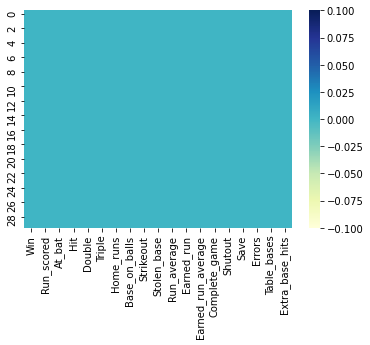

In [21]:
sns.heatmap(df.isnull(), cmap = 'YlGnBu')  # visualisation of no null values

## Visualization of dataset

### Checking Outliers

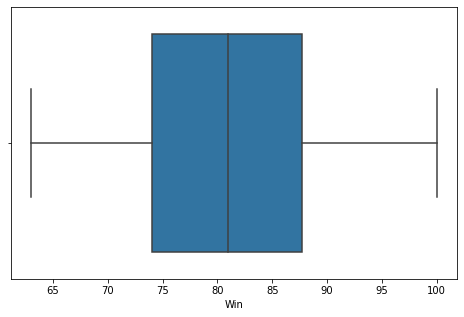

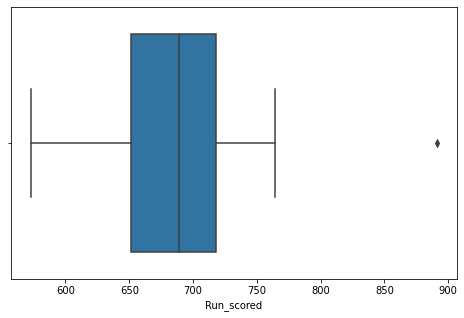

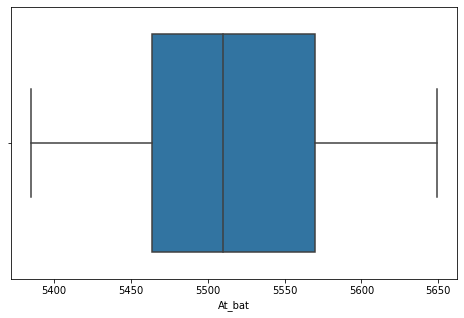

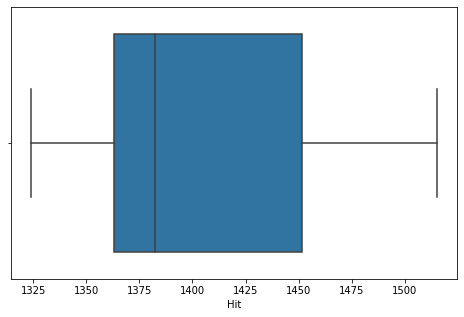

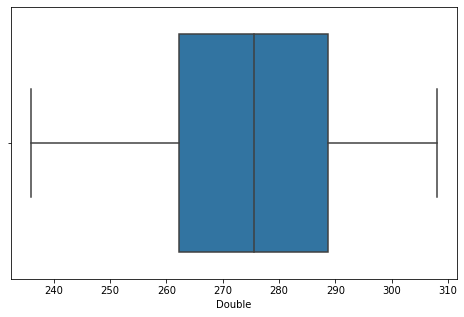

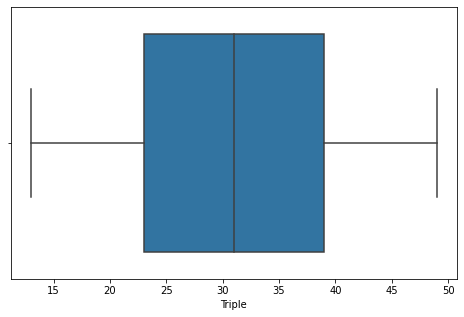

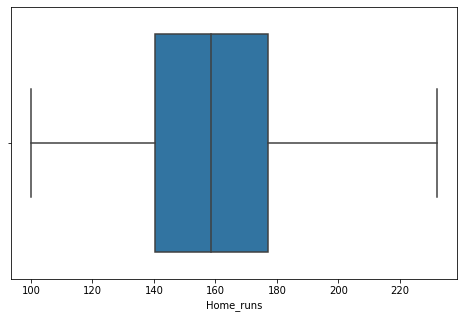

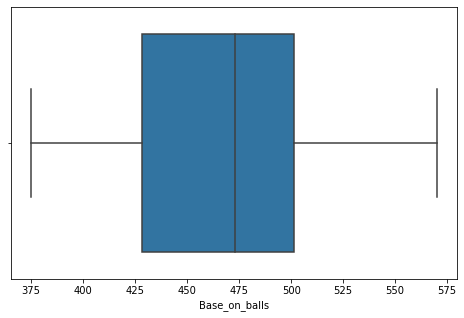

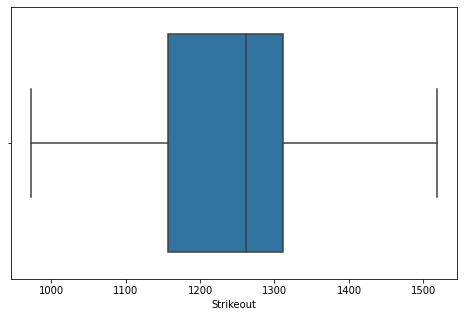

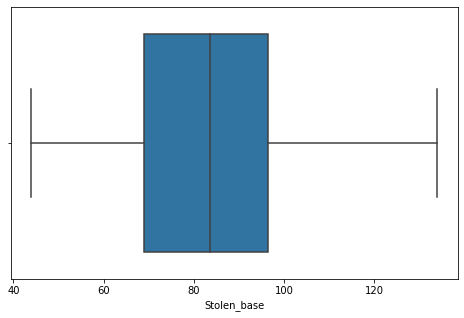

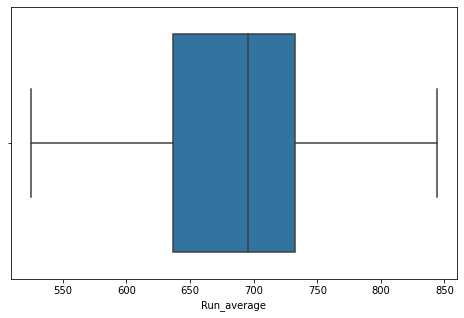

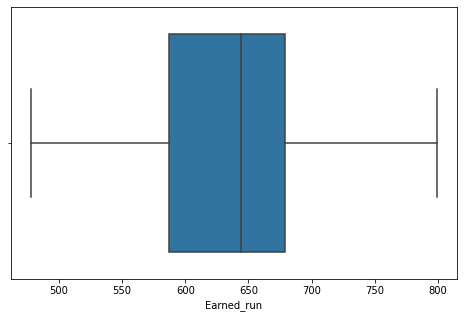

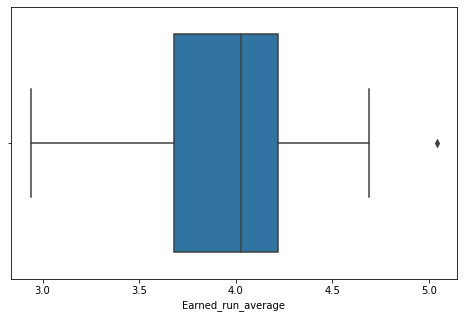

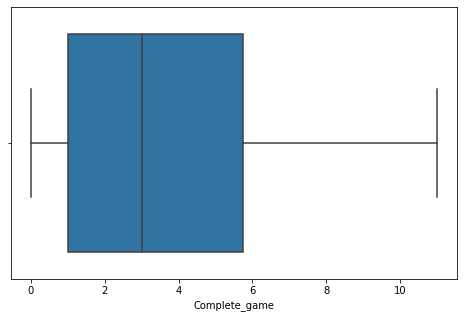

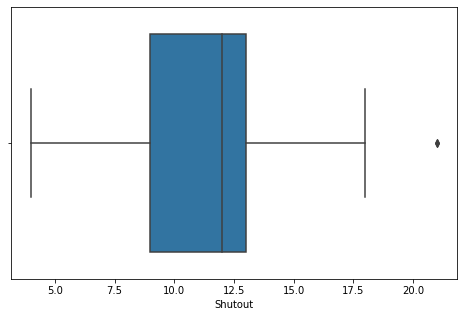

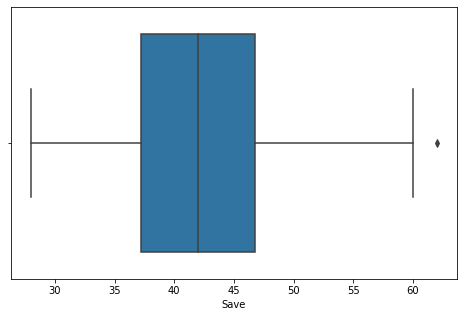

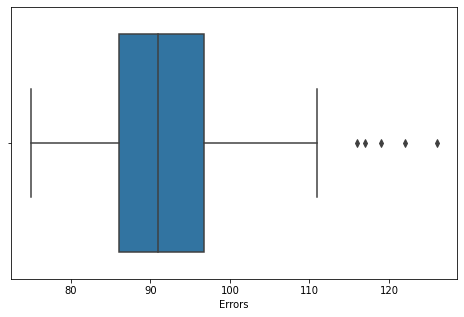

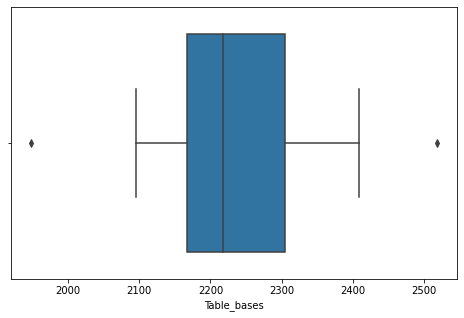

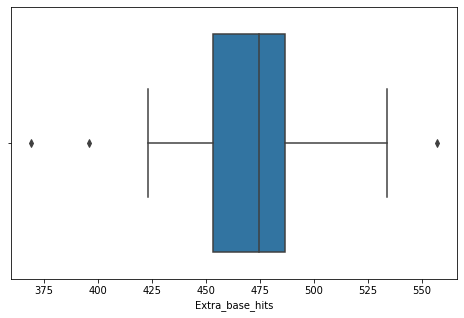

In [22]:
for i in df.columns:
    plt.figure(figsize = (8, 5))
    sns.boxplot(df[i])

In [23]:
# Run_scored
# Earned_run_average
# Shutout
# Save
# Errors
# Total_bases
# Extra_base_hits
# These mentioned columns have few outliers, needs to remove

## Checking Skewness

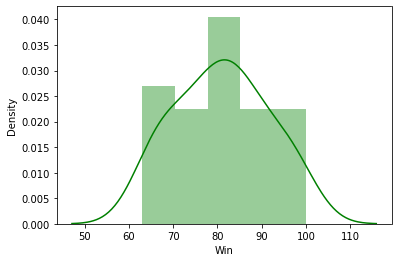

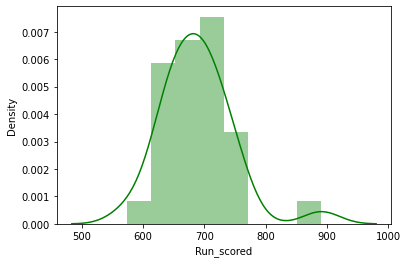

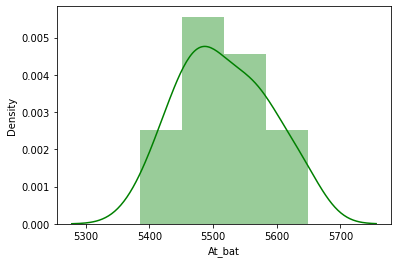

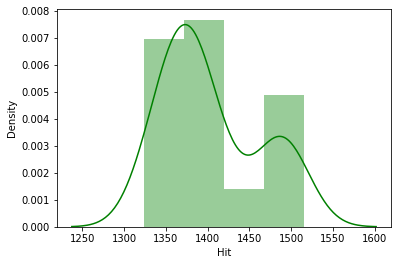

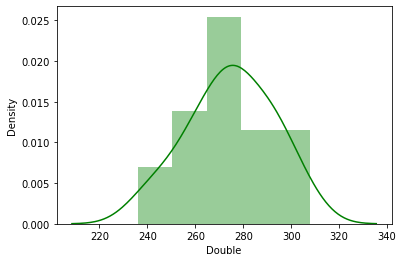

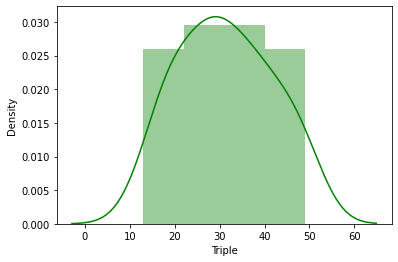

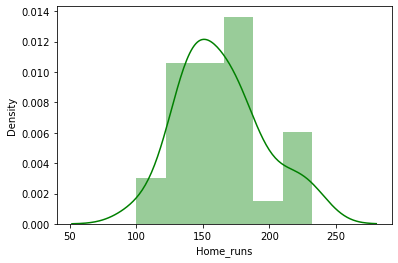

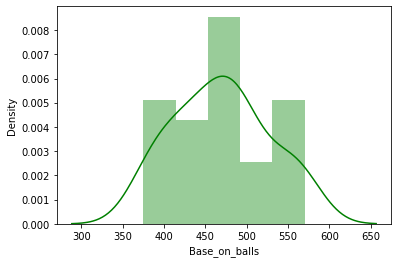

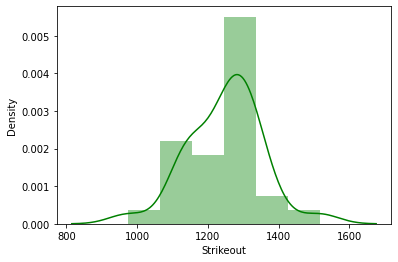

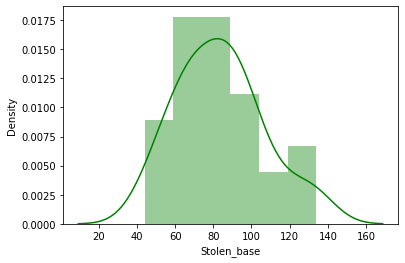

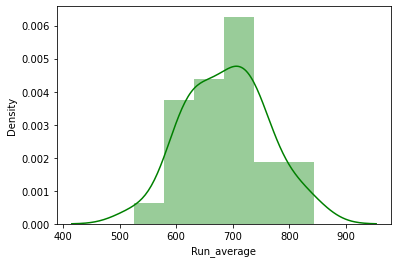

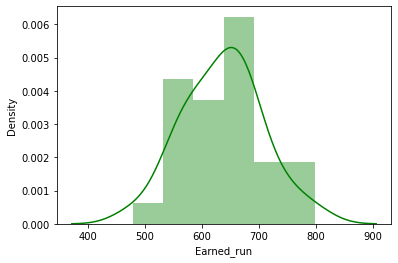

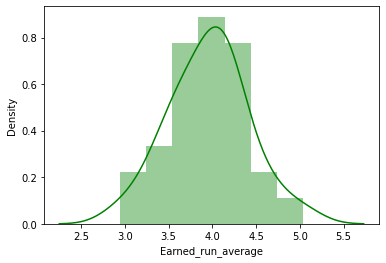

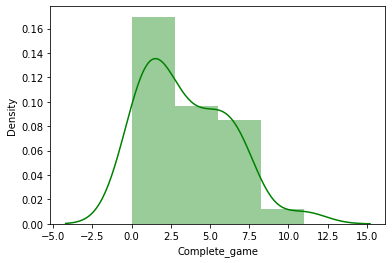

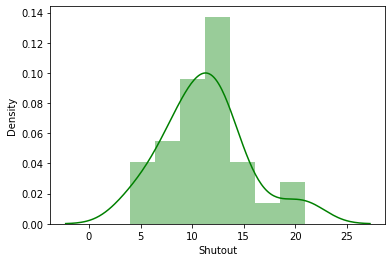

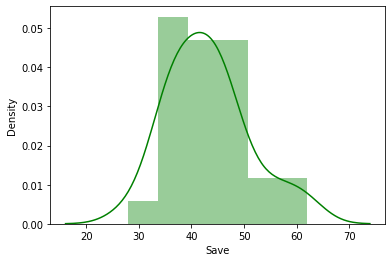

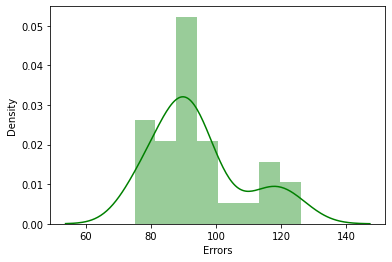

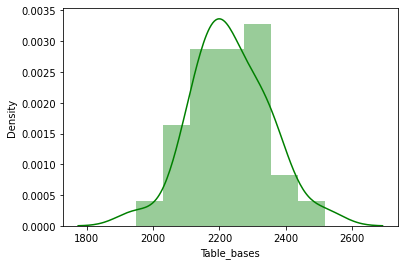

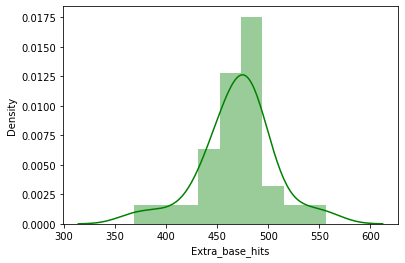

In [24]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i], color = 'g')

In [25]:
# Almost every column is unskewned except few
# Run_scored is little left skewed
# Hit column is also left skewed
# Strikeout column is also showing little bit skewness
# Error is also showing left skewness

## Distribution of columns

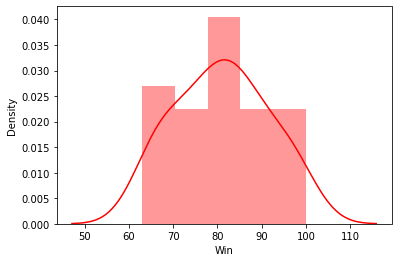

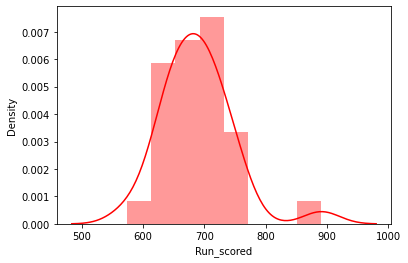

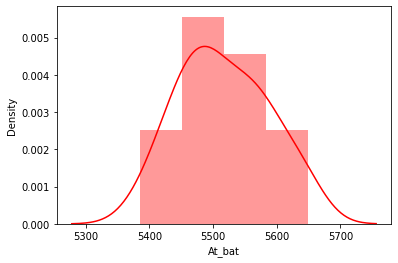

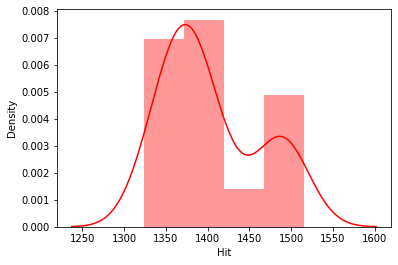

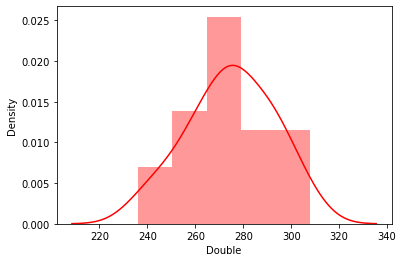

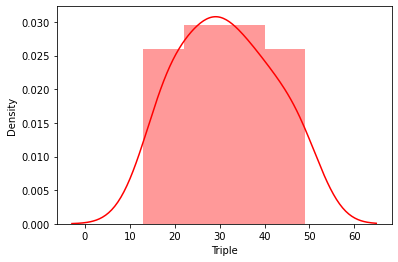

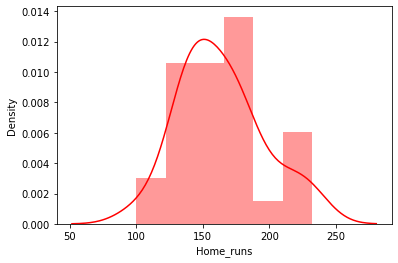

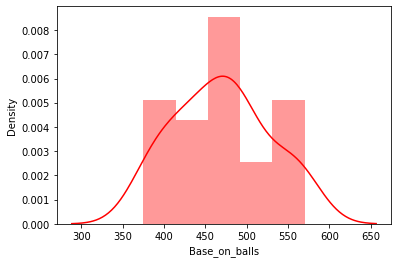

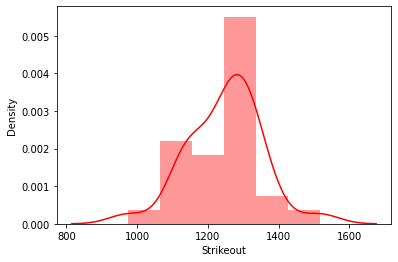

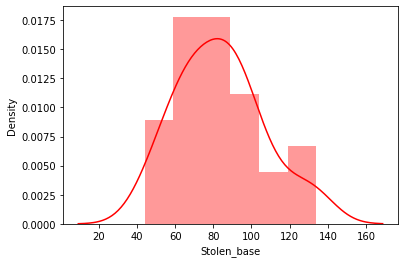

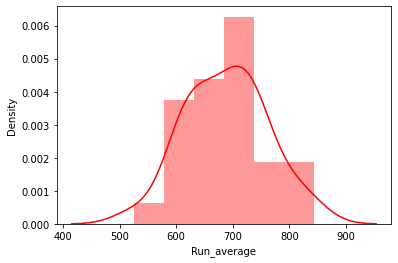

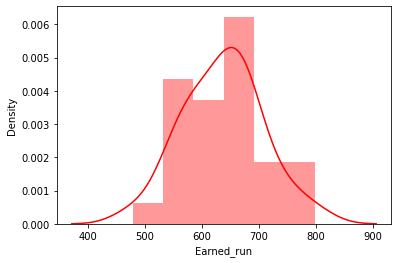

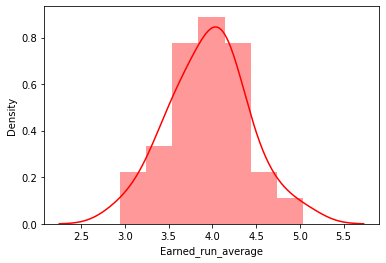

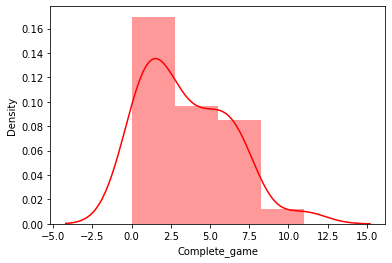

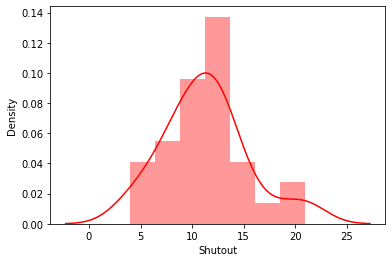

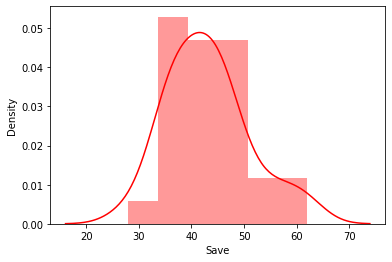

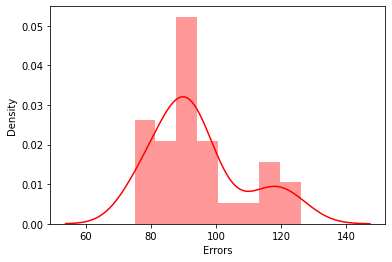

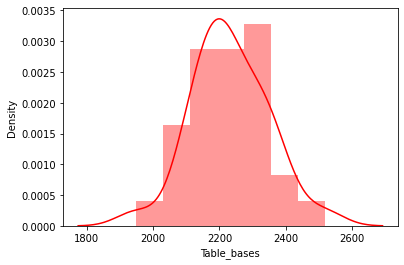

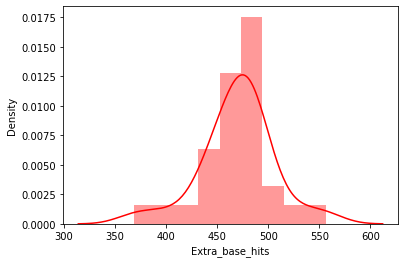

In [26]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i], kde = True, color = 'r')

In [27]:
# Almost every column is normally distributed except few
# Run_scored is not normally distributed
# Hit column is also not normally distributed
# Strikeout column is also not normally distributed 
# Error is not normally distrihuted

## Spread of data

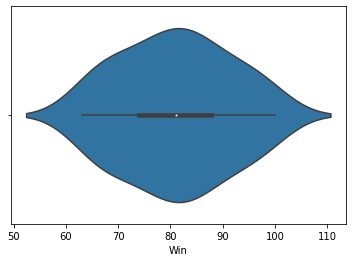

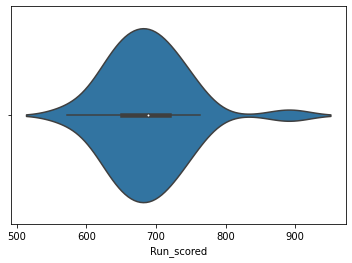

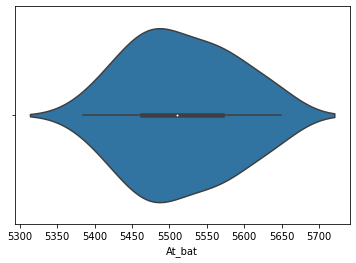

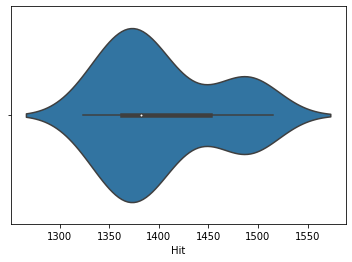

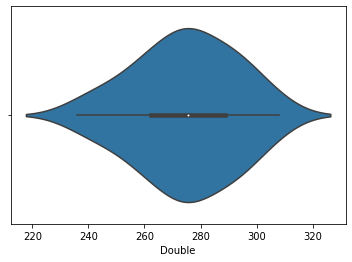

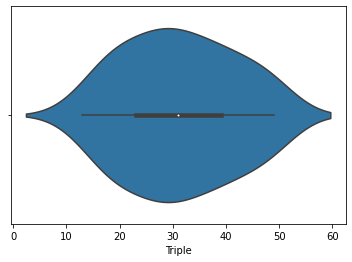

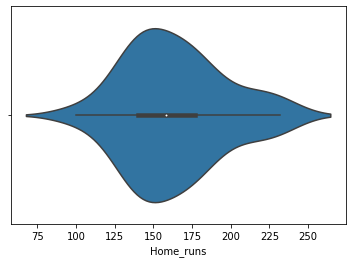

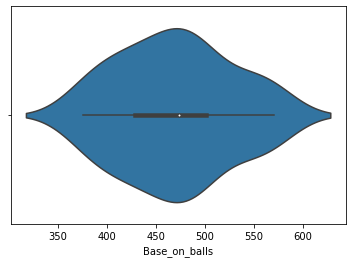

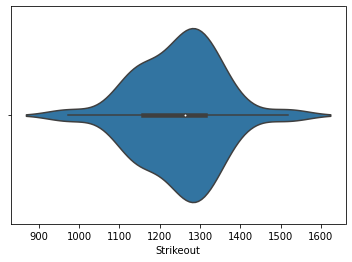

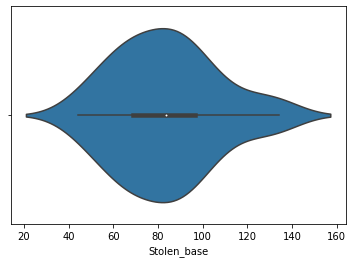

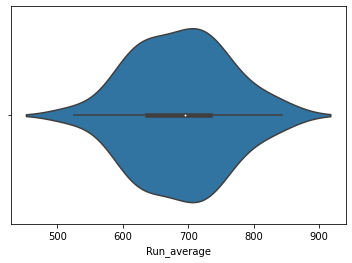

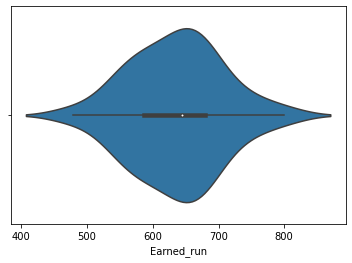

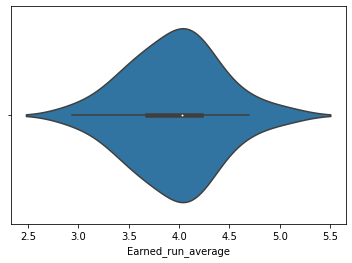

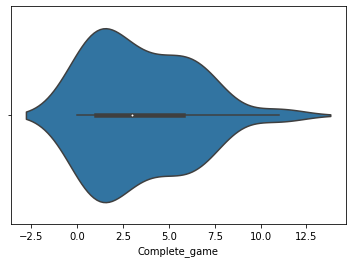

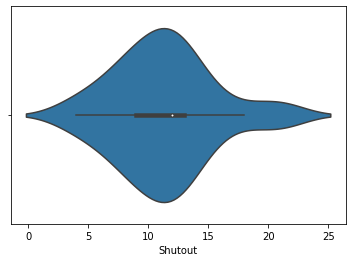

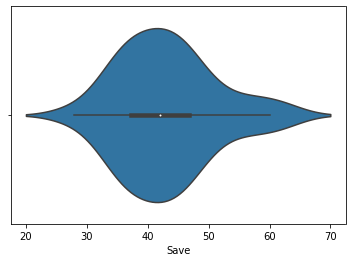

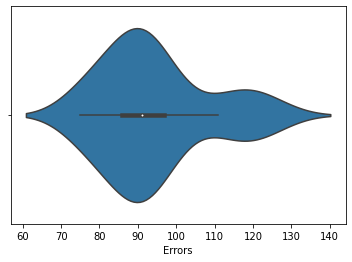

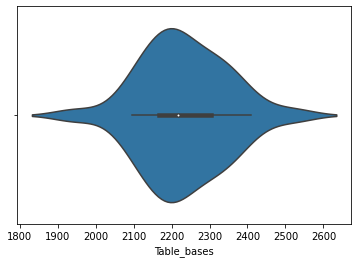

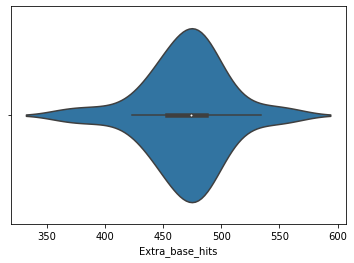

In [28]:
for i in df.columns:    
    plt.figure()
    sns.violinplot(df[i], orient = 'vertical')

In [29]:
# Almost every column is well spread 
# Run_scored is highly spread between 600 - 800
# Total_bases is higly spread between 2200 - 2400
# As few columns have outlier they are showing less spread as compared with other one

## Understanding pattern of data

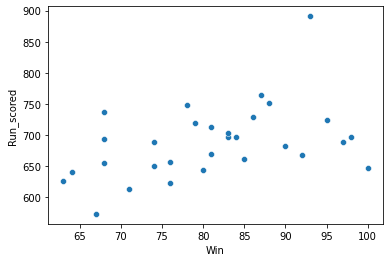

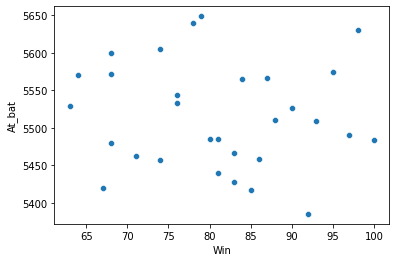

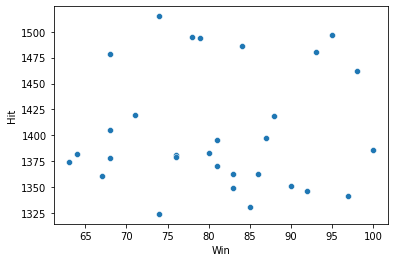

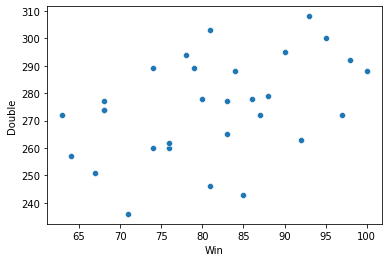

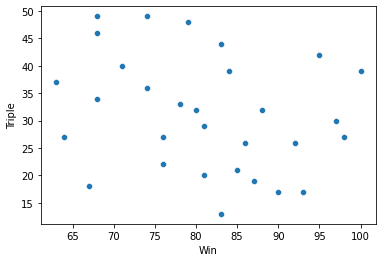

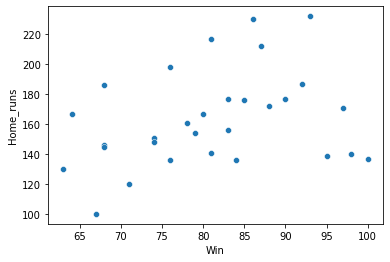

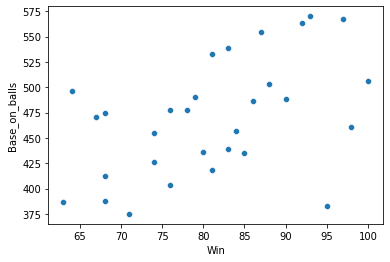

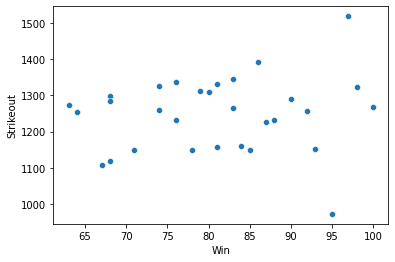

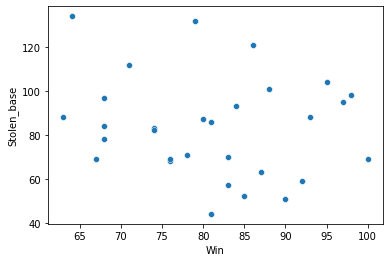

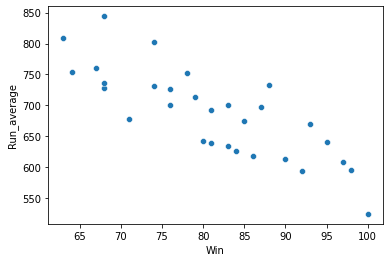

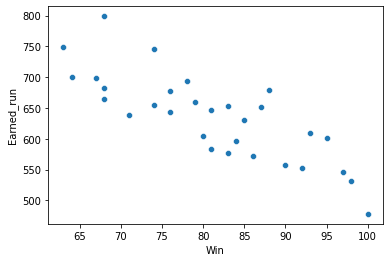

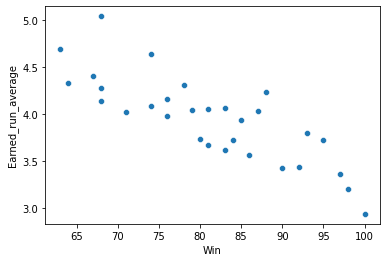

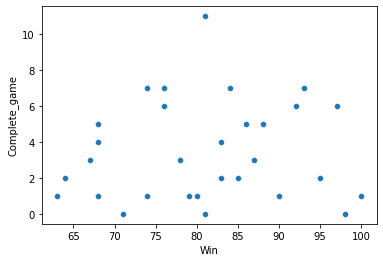

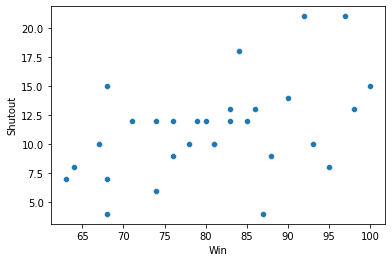

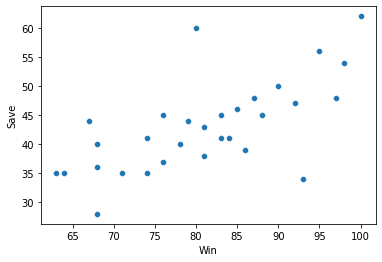

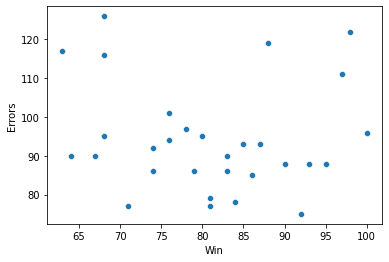

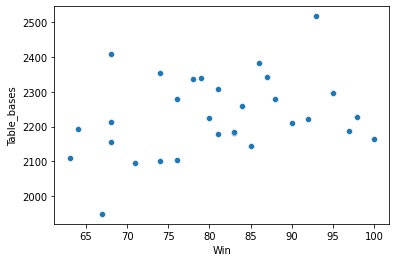

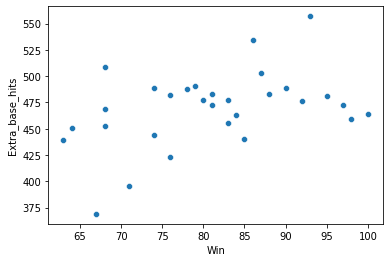

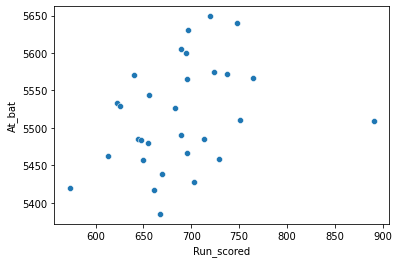

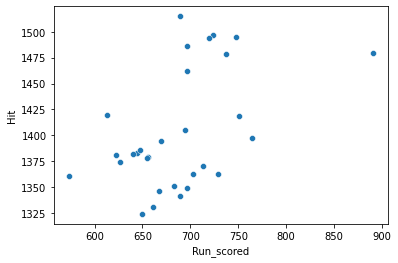

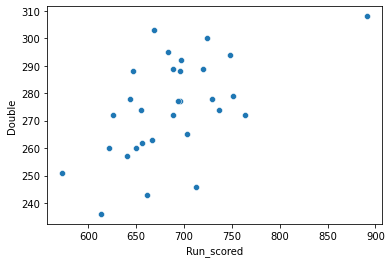

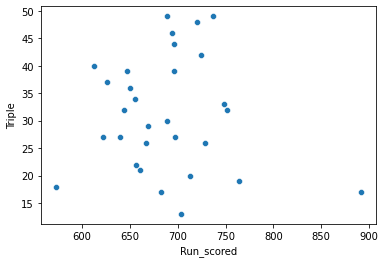

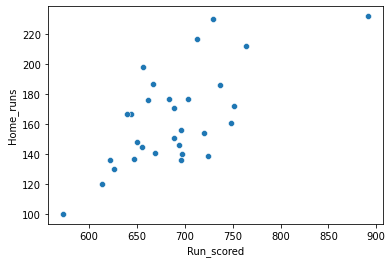

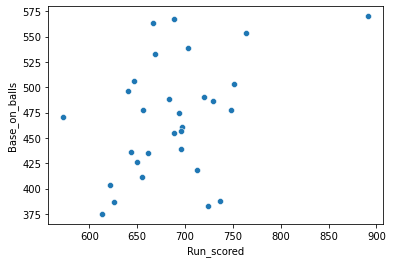

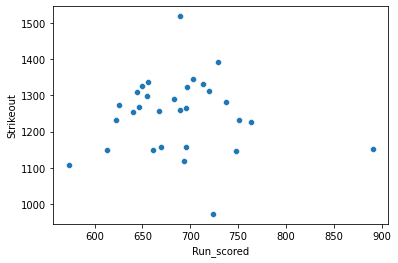

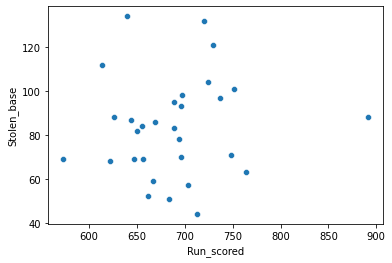

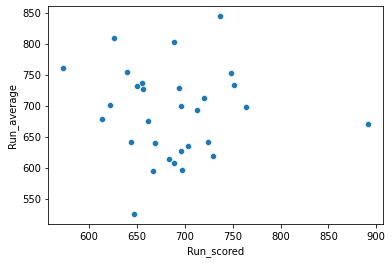

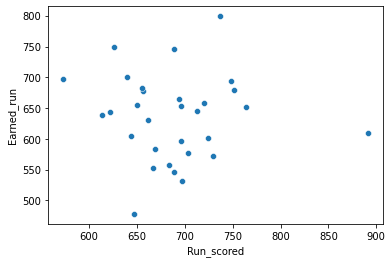

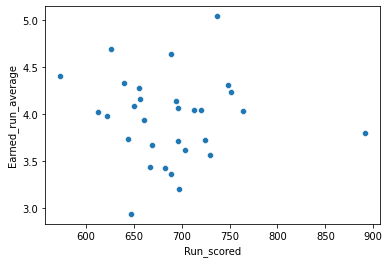

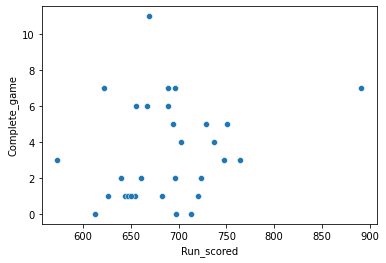

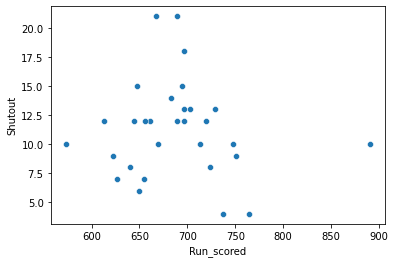

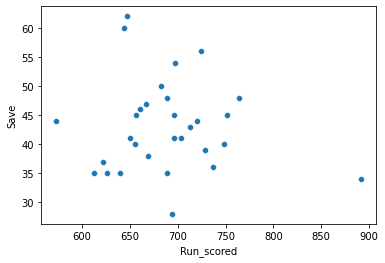

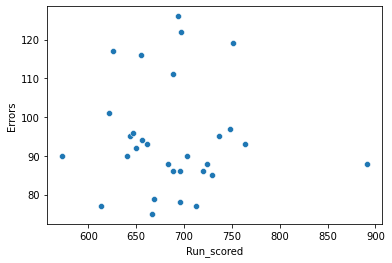

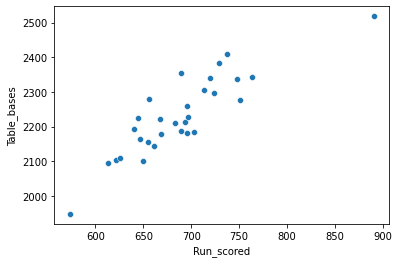

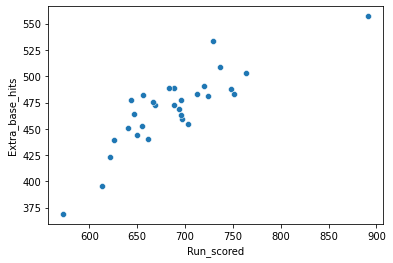

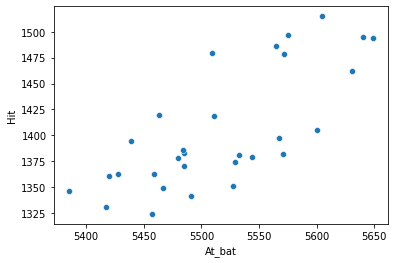

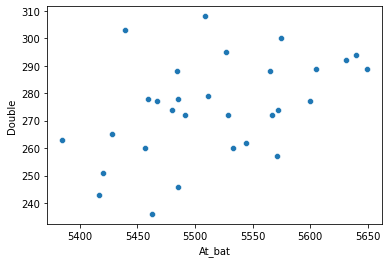

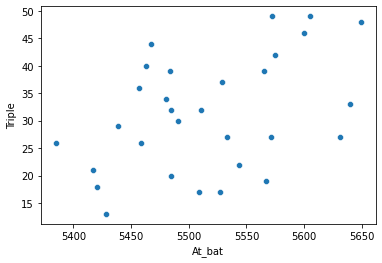

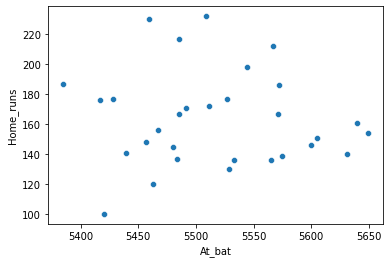

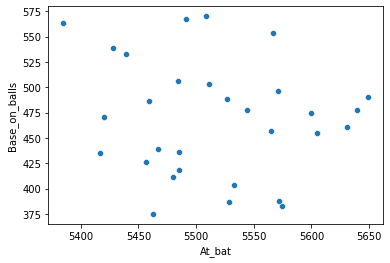

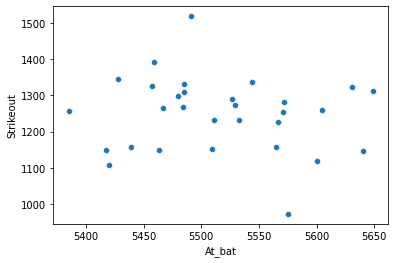

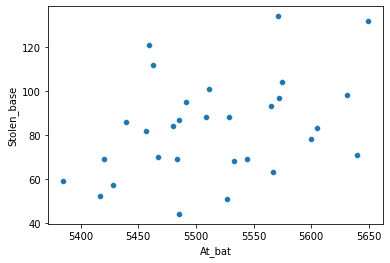

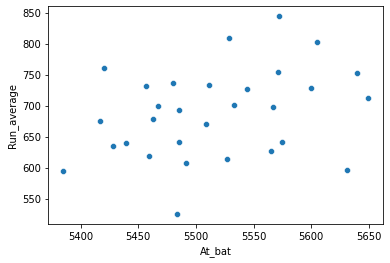

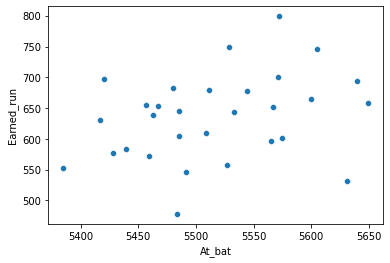

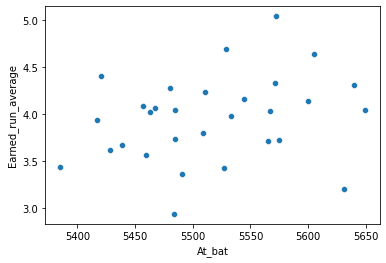

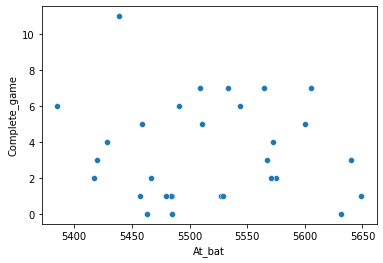

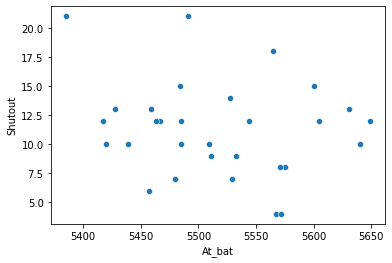

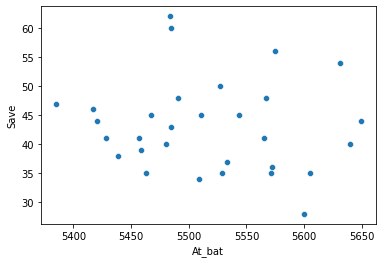

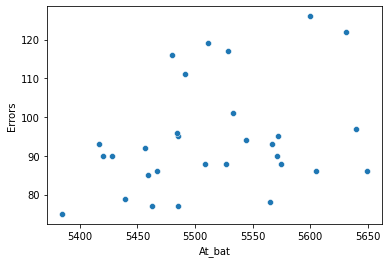

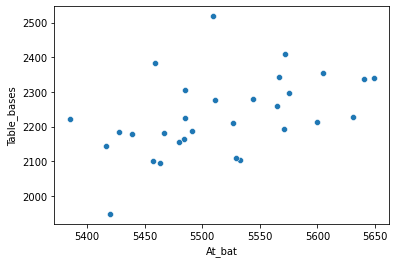

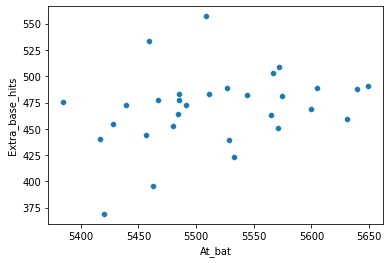

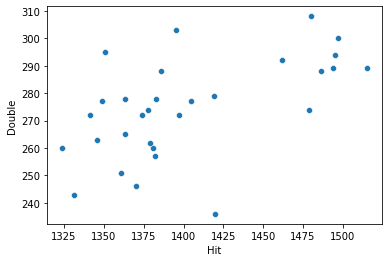

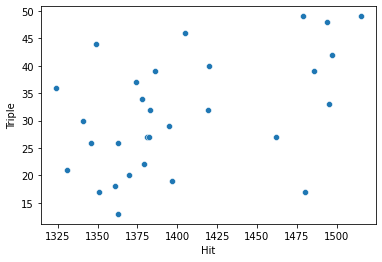

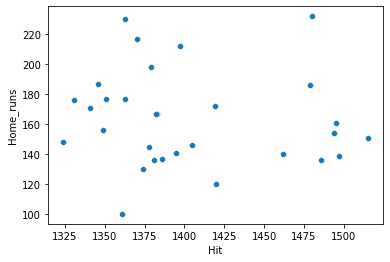

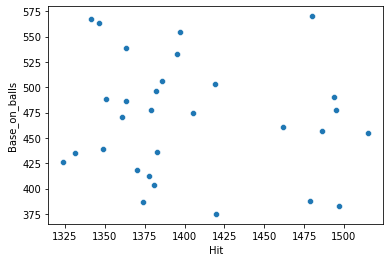

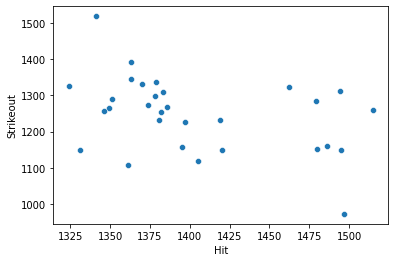

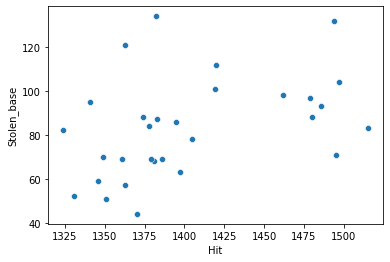

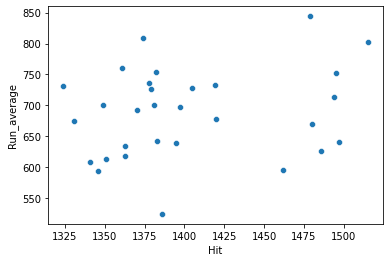

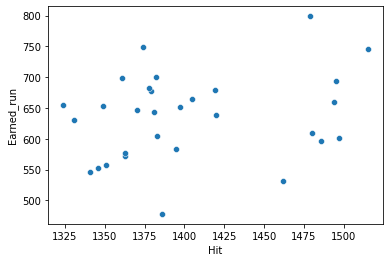

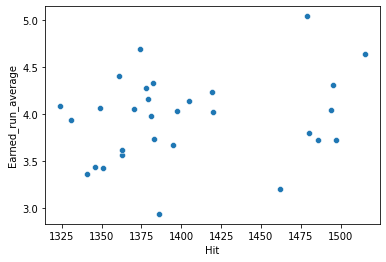

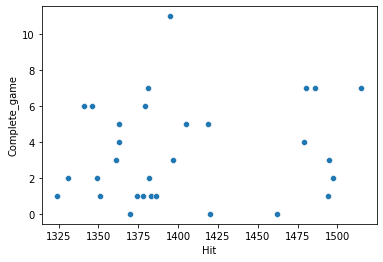

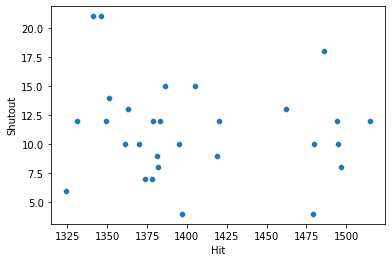

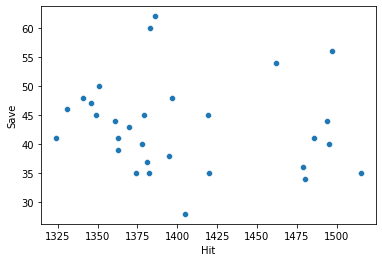

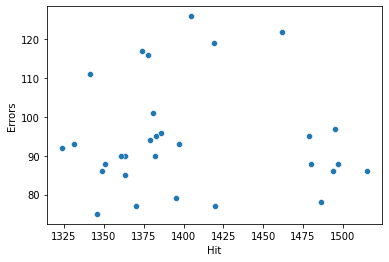

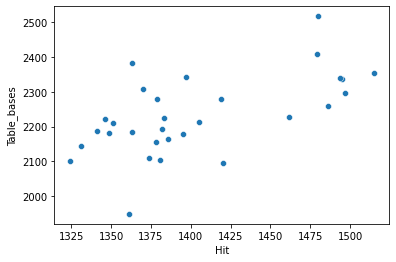

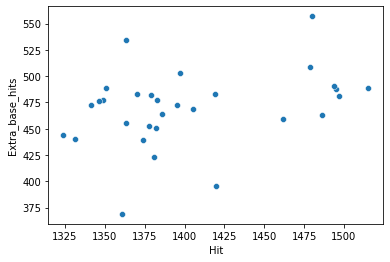

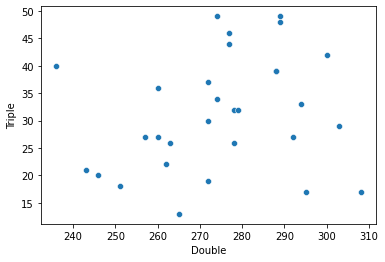

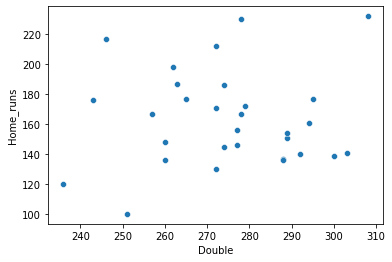

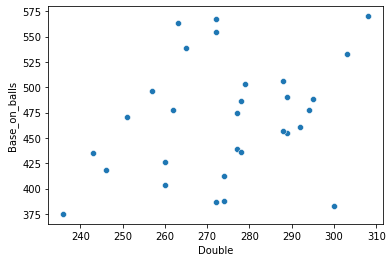

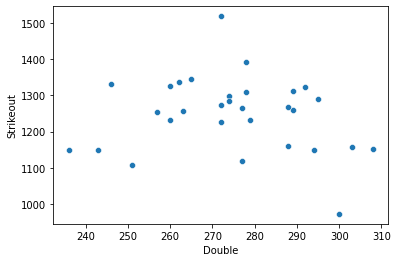

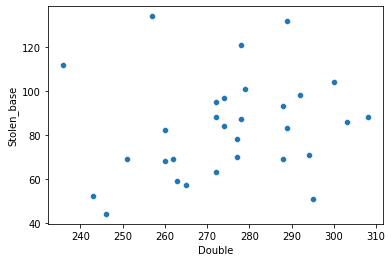

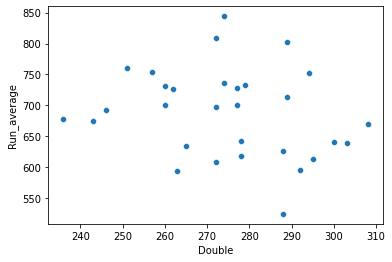

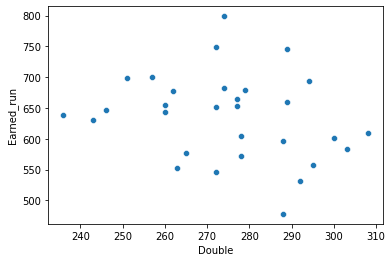

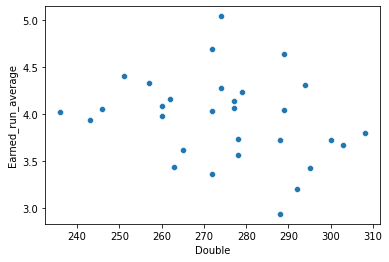

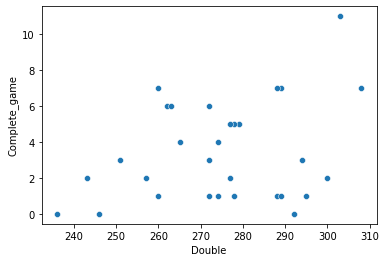

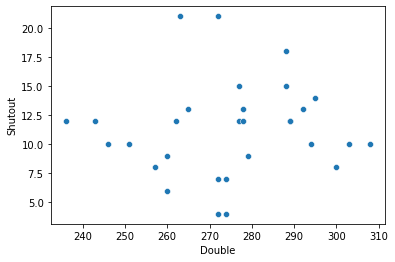

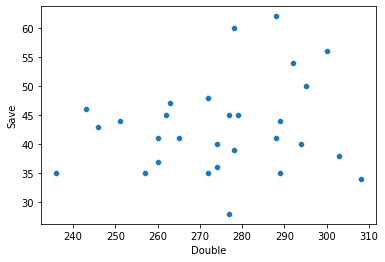

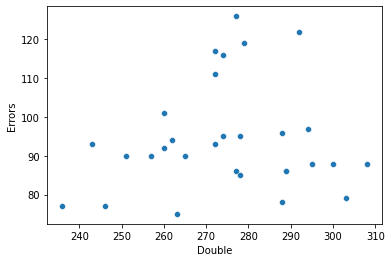

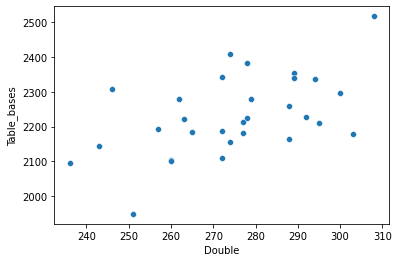

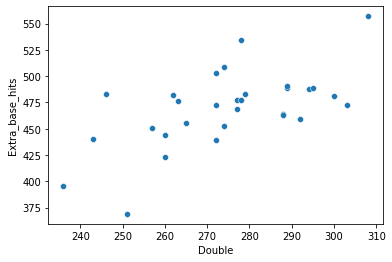

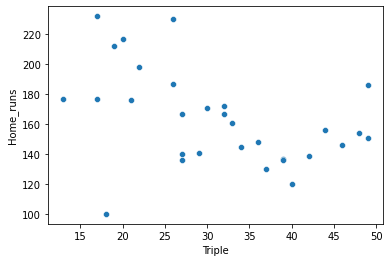

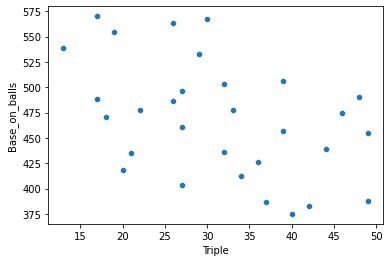

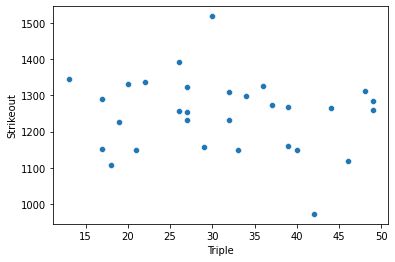

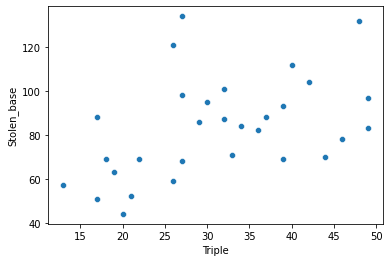

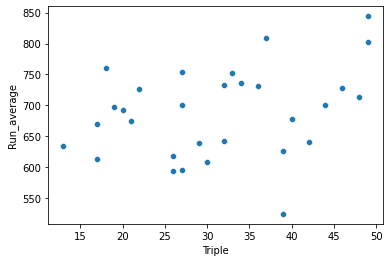

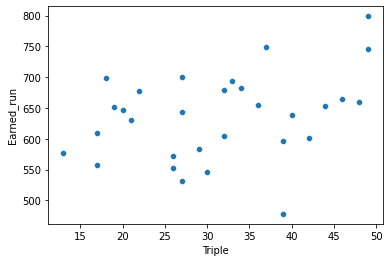

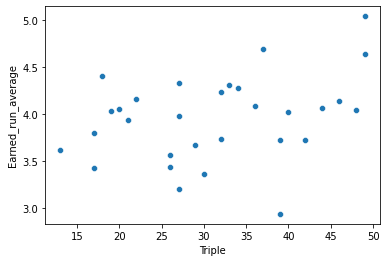

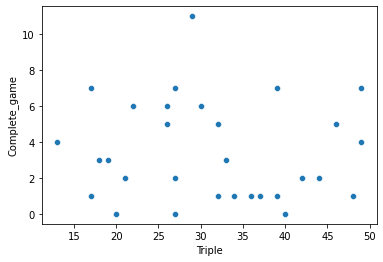

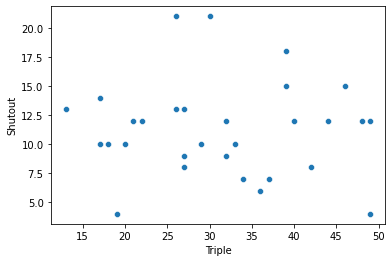

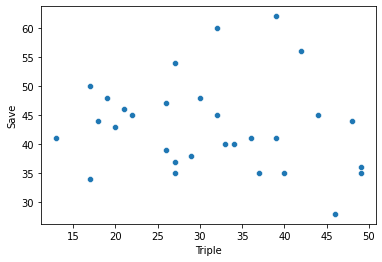

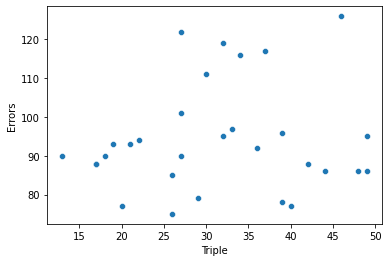

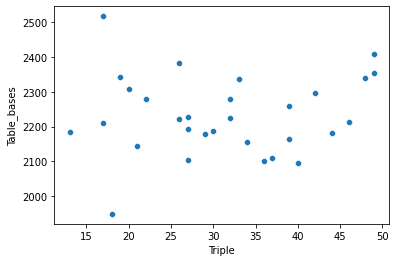

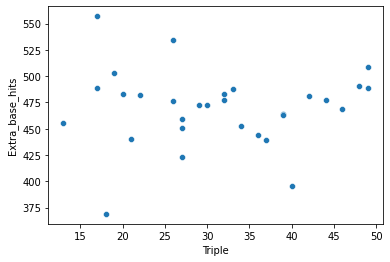

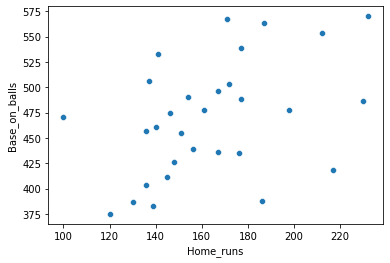

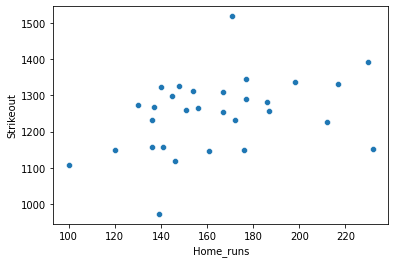

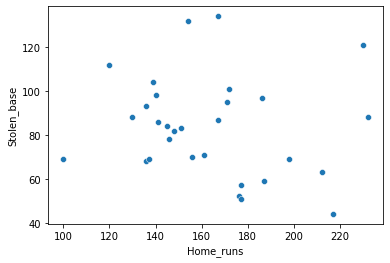

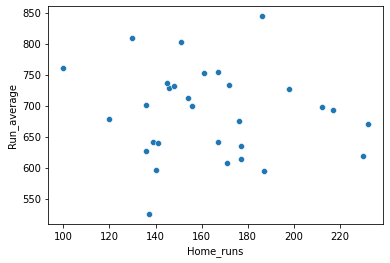

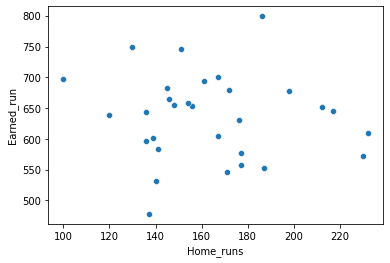

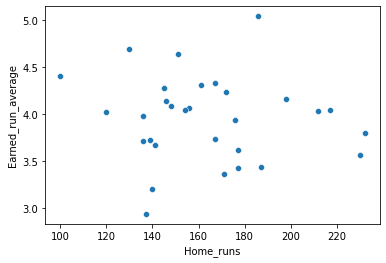

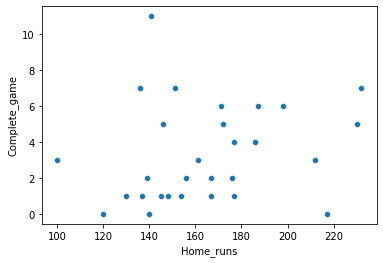

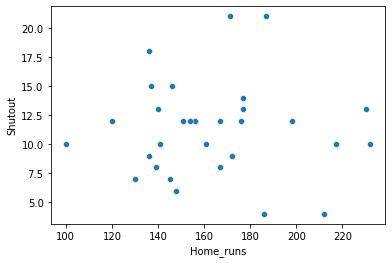

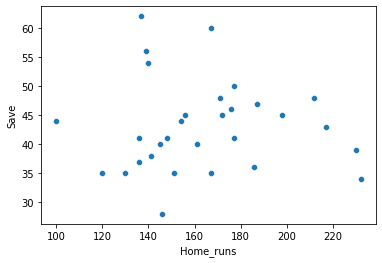

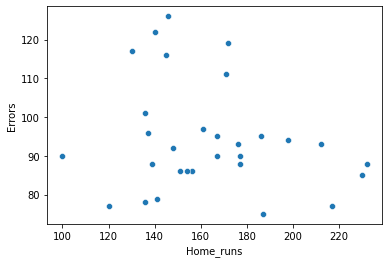

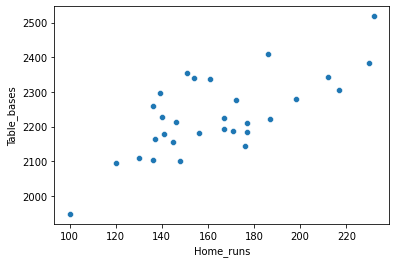

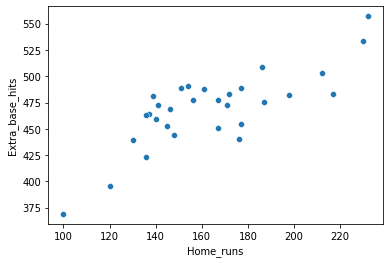

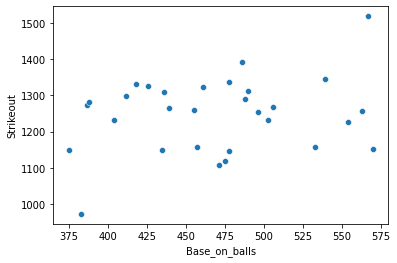

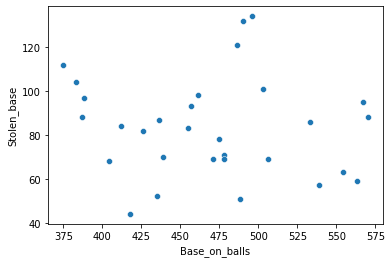

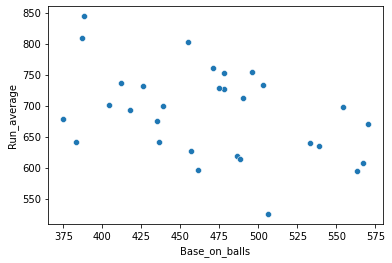

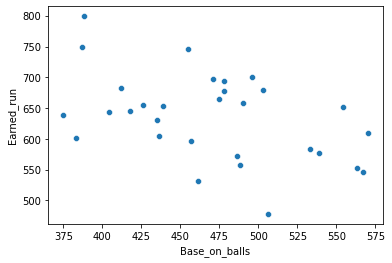

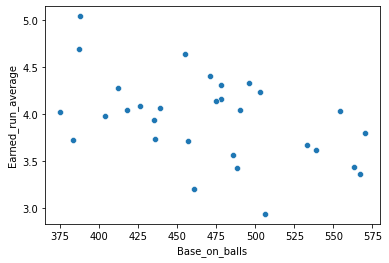

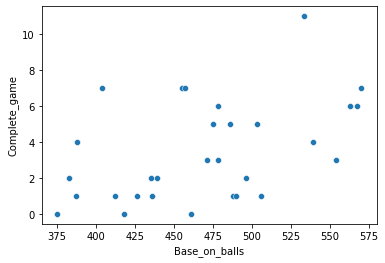

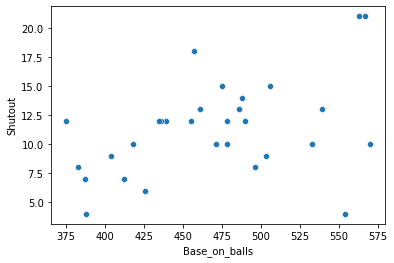

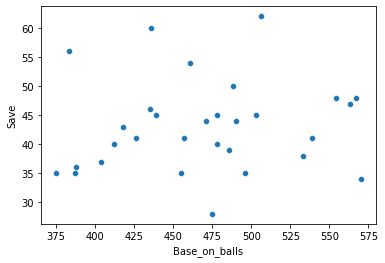

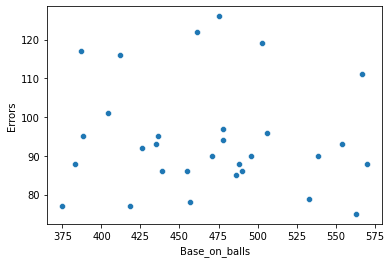

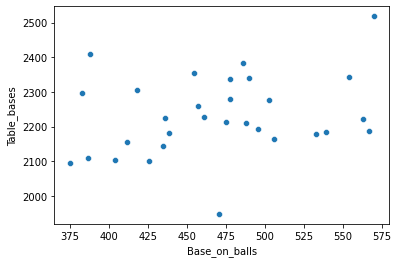

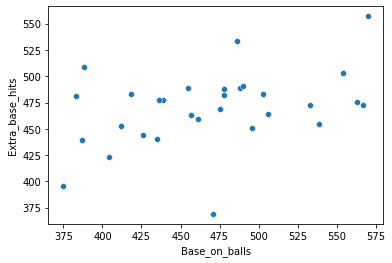

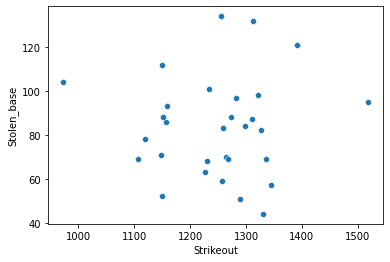

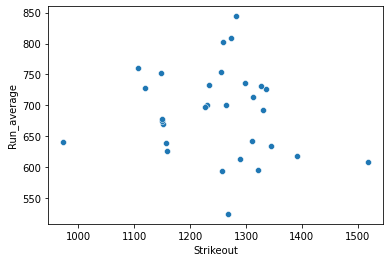

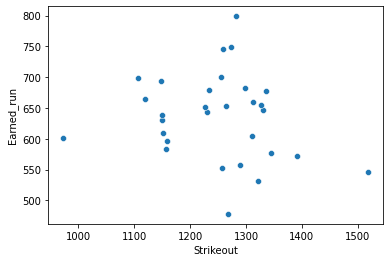

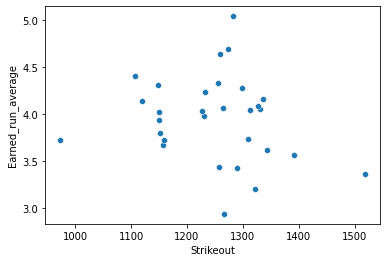

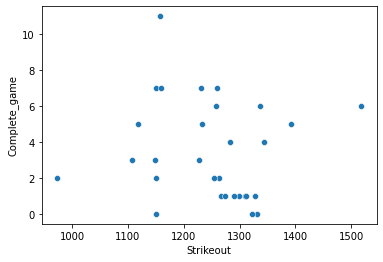

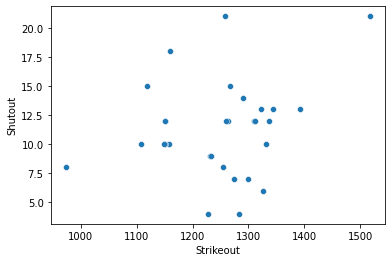

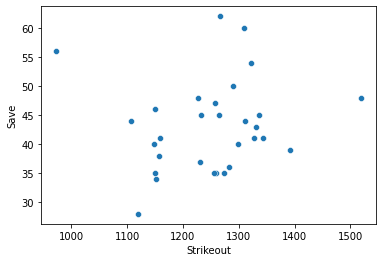

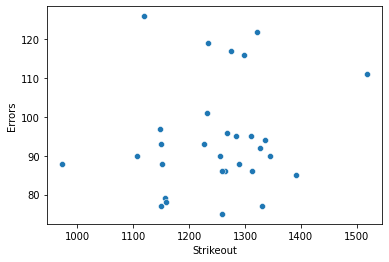

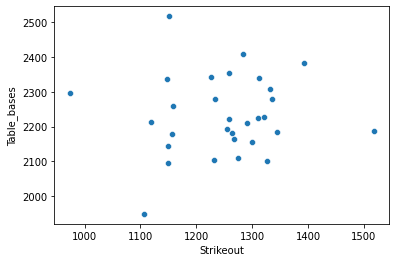

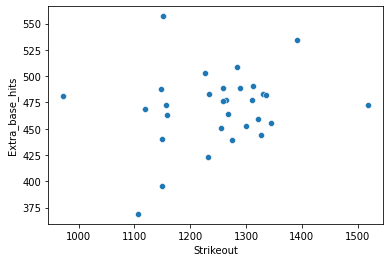

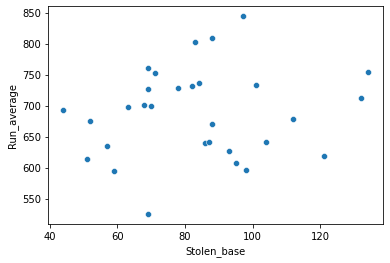

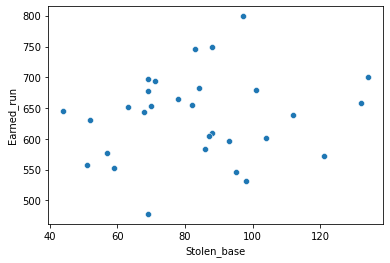

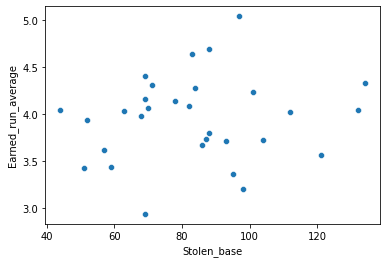

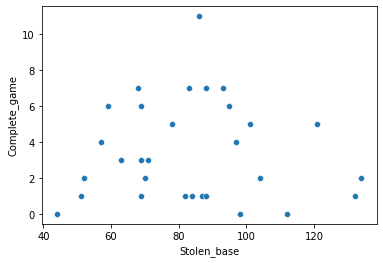

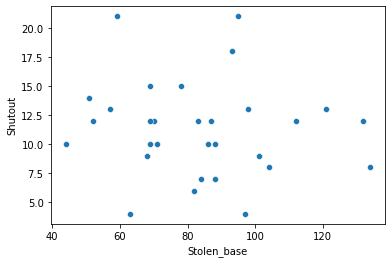

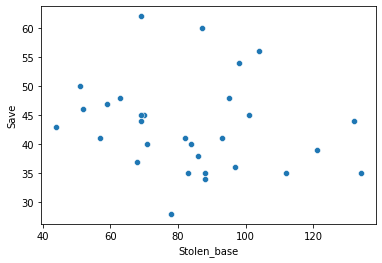

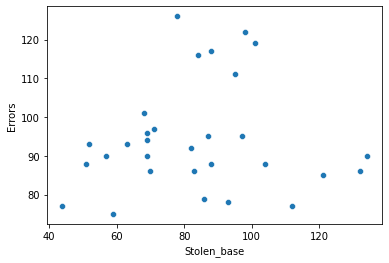

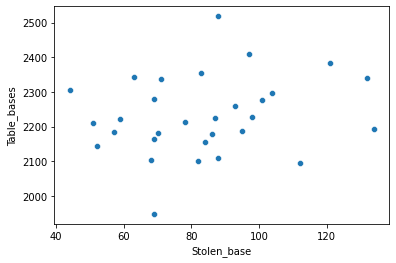

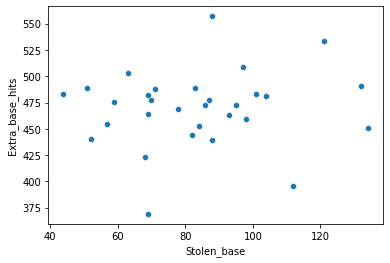

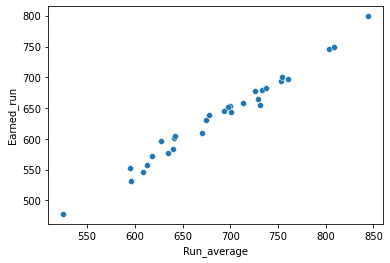

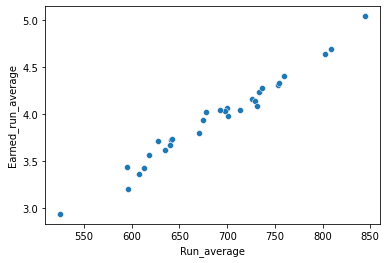

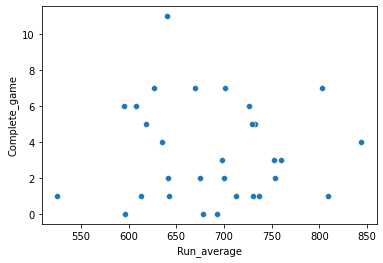

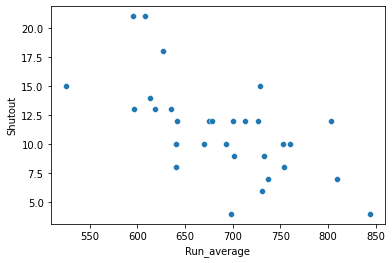

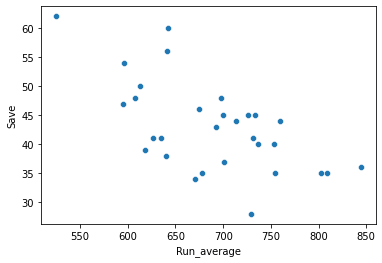

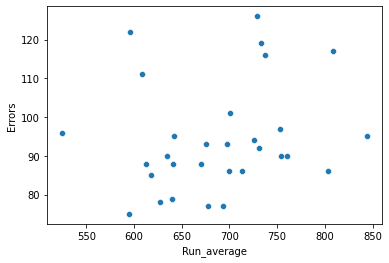

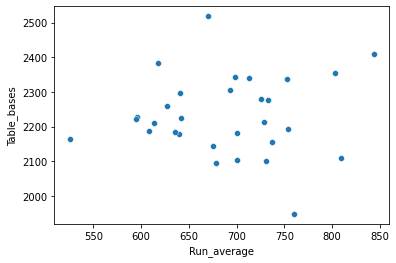

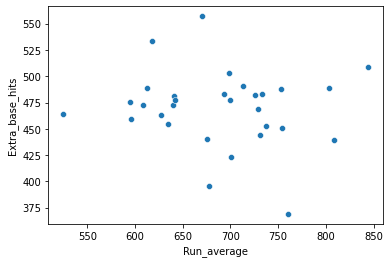

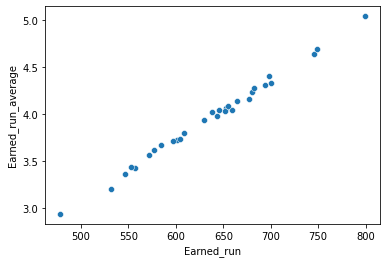

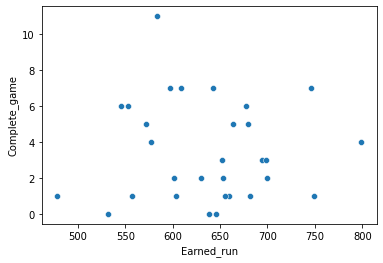

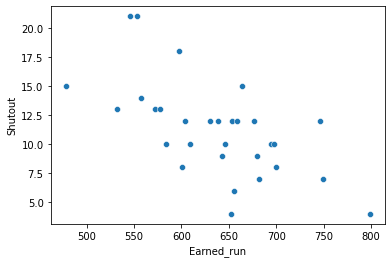

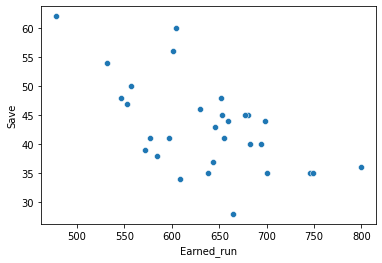

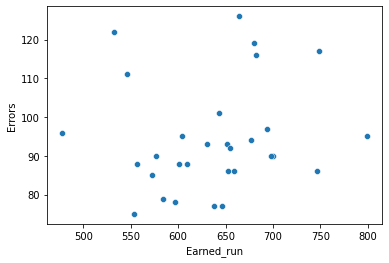

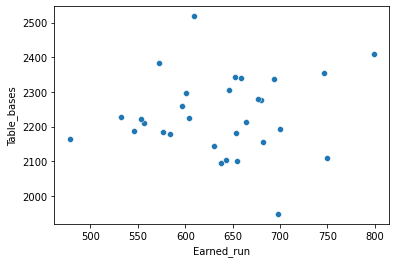

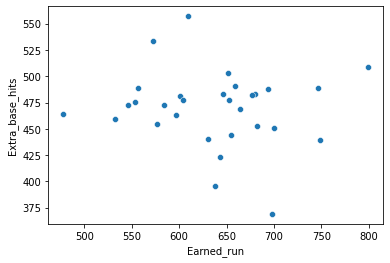

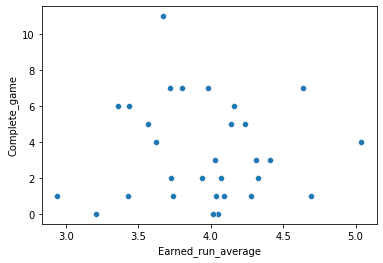

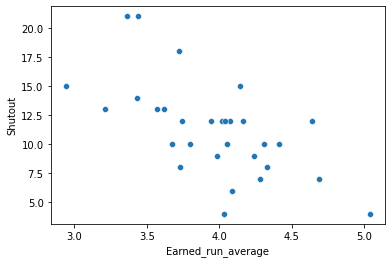

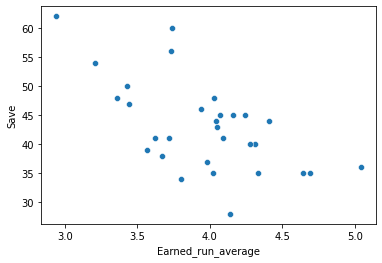

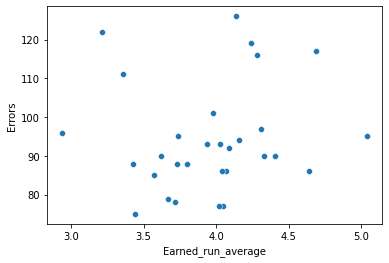

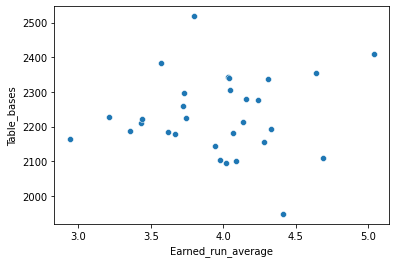

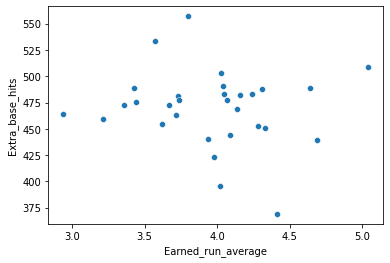

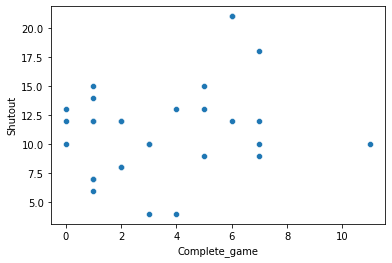

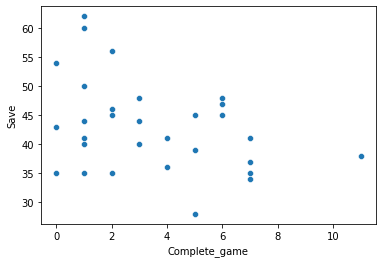

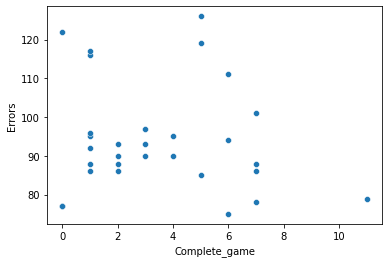

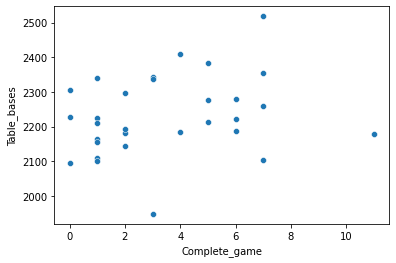

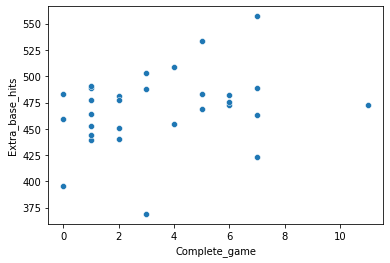

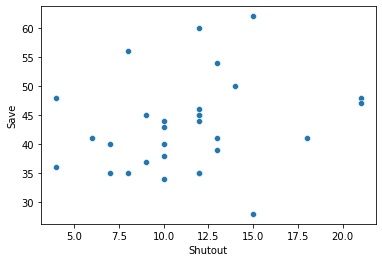

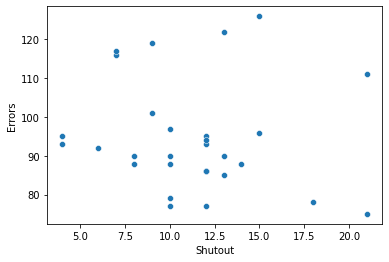

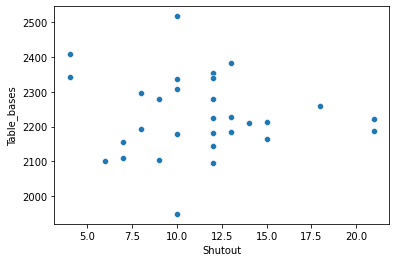

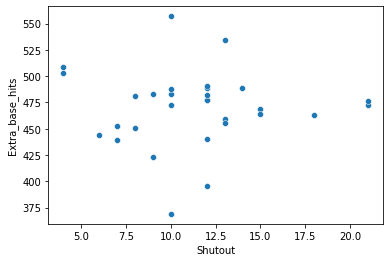

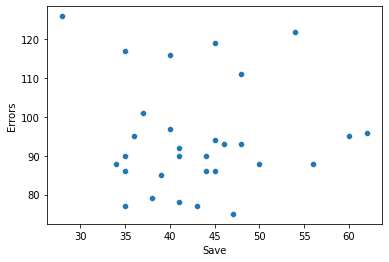

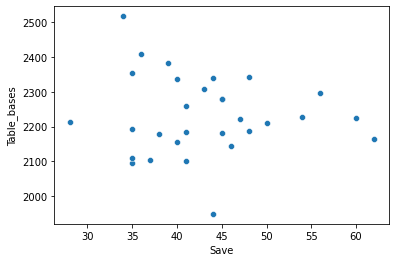

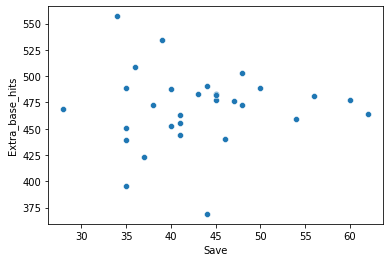

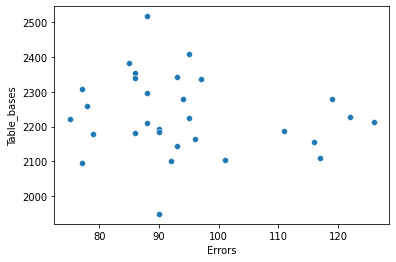

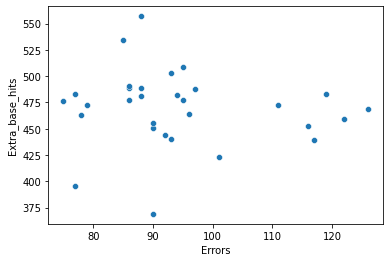

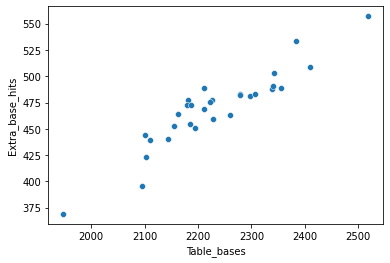

In [30]:
for i in range(len(df.columns)):

    for j in df.columns[i+1:]:    
        plt.figure()
        sns.scatterplot(df[df.columns[i]], df[j])
        
# data set is showing linearity 
# We should apply liner  ml algorithm to get best result
# Run_average, Earned_run and Earned_Run_average are showing negative relation with target columns (wins)
# other then these column maximum are showing positive linearity with targate columns (wins)

## Correlation of the columns

In [31]:
df.corr()  # correlation of the data

Win  Run_scored    At_bat       Hit    Double  \
Win                 1.000000    0.430751 -0.087947  0.037612  0.427797   
Run_scored          0.430751    1.000000  0.319464  0.482856  0.560084   
At_bat             -0.087947    0.319464  1.000000  0.739122  0.453370   
Hit                 0.037612    0.482856  0.739122  1.000000  0.566847   
Double              0.427797    0.560084  0.453370  0.566847  1.000000   
Triple             -0.251118   -0.070072  0.435422  0.478694  0.220490   
Home_runs           0.307407    0.671283 -0.066983 -0.090855  0.056292   
Base_on_balls       0.484342    0.402452 -0.136414 -0.118281  0.302700   
Strikeout           0.111850   -0.054726 -0.106022 -0.398830 -0.150752   
Stolen_base        -0.157234    0.081367  0.372618  0.413444  0.195027   
Run_average        -0.812952   -0.041623  0.316010  0.224324 -0.218160   
Earned_run         -0.809435   -0.041245  0.309686  0.252489 -0.235531   
Earned_run_average -0.819600   -0.049281  0.255551  0.231172 -0.254854   
Complete_game       0.080533    0.232042 -0.080876  0.147955  0.306675   
Shutout             0.471805   -0.103274 -0.197321 -0.145559  0.057998   
Save                0.666530   -0.096380 -0.106367 -0.130371  0.171576   
Errors             -0.089485   -0.023262  0.316743 -0.033173  0.105754   
Table_bases         0.296851    0.876416  0.464160  0.600281  0.528121   
Extra_base_hits     0.411491    0.849684  0.293405  0.341627  0.612895   

                      Triple  Home_runs  Base_on_balls  Strikeout  \
Win                -0.251118   0.307407       0.484342   0.111850   
Run_scored         -0.070072   0.671283       0.402452  -0.054726   
At_bat              0.435422  -0.066983      -0.136414  -0.106022   
Hit                 0.478694  -0.090855      -0.118281  -0.398830   
Double              0.220490   0.056292       0.302700  -0.150752   
Triple              1.000000  -0.430915      -0.454949  -0.141196   
Home_runs          -0.430915   1.000000       0.425691   0.359923   
Base_on_balls      -0.454949   0.425691       1.000000   0.233652   
Strikeout          -0.141196   0.359923       0.233652   1.000000   
Stolen_base         0.457437  -0.136567      -0.098347   0.030968   
Run_average         0.314125  -0.103903      -0.416445  -0.129745   
Earned_run          0.340225  -0.085922      -0.452663  -0.161612   
Earned_run_average  0.330951  -0.090917      -0.459832  -0.180368   
Complete_game      -0.065898   0.156502       0.462478  -0.093418   
Shutout            -0.041396  -0.019119       0.426004   0.237721   
Save               -0.142370  -0.028540       0.099445   0.126297   
Errors              0.126678  -0.207597      -0.075685   0.155133   
Table_bases         0.097016   0.718690       0.260692   0.051466   
Extra_base_hits     0.020136   0.782650       0.394091   0.200240   

                    Stolen_base  Run_average  Earned_run  Earned_run_average  \
Win                   -0.157234    -0.812952   -0.809435           -0.819600   
Run_scored             0.081367    -0.041623   -0.041245           -0.049281   
At_bat                 0.372618     0.316010    0.309686            0.255551   
Hit                    0.413444     0.224324    0.252489            0.231172   
Double                 0.195027    -0.218160   -0.235531           -0.254854   
Triple                 0.457437     0.314125    0.340225            0.330951   
Home_runs             -0.136567    -0.103903   -0.085922           -0.090917   
Base_on_balls         -0.098347    -0.416445   -0.452663           -0.459832   
Strikeout              0.030968    -0.129745   -0.161612           -0.180368   
Stolen_base            1.000000     0.132290    0.143068            0.126063   
Run_average            0.132290     1.000000    0.991018            0.986674   
Earned_run             0.143068     0.991018    1.000000            0.997248   
Earned_run_average     0.126063     0.986674    0.997248            1.000000   
Complete_game         -0.020783    -0.01665

<AxesSubplot:>

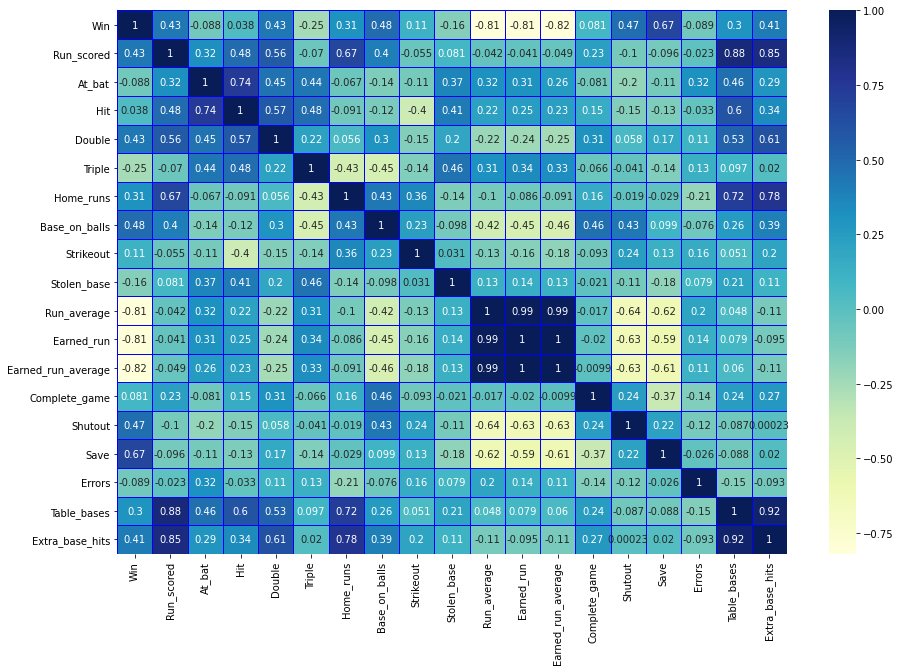

In [32]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu', linewidth = 0.5, linecolor = 'blue' )   # Heatmap with number, 

In [33]:
# Run_average, Earned_run and Earned_run_average columns are showing high correlation with each other, need to resolve it
# Table_bases also showing high correlation with run_scored and Extra_bases_hits
# As i observed, multicolinearity is present in the dataset , we need to work on it

## Describe data

In [34]:
df.describe()   # Describing dataset

Win  Run_scored       At_bat          Hit      Double  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

          Triple   Home_runs  Base_on_balls   Strikeout  Stolen_base  \
count  30.000000   30.000000      30.000000    30.00000    30.000000   
mean   31.300000  163.633333     469.100000  1248.20000    83.500000   
std    10.452355   31.823309      57.053725   103.75947    22.815225   
min    13.000000  100.000000     375.000000   973.00000    44.000000   
25%    23.000000  140.250000     428.250000  1157.50000    69.000000   
50%    31.000000  158.500000     473.000000  1261.50000    83.500000   
75%    39.000000  177.000000     501.250000  1311.50000    96.500000   
max    49.000000  232.000000     570.000000  1518.00000   134.000000   

       Run_average  Earned_run  Earned_run_average  Complete_game    Shutout  \
count    30.000000   30.000000           30.000000      30.000000  30.000000   
mean    688.233333  635.833333            3.956333       3.466667  11.300000   
std      72.108005   70.140786            0.454089       2.763473   4.120177   
min     525.000000  478.000000            2.940000       0.000000   4.000000   
25%     636.250000  587.250000            3.682500       1.000000   9.000000   
50%     695.500000  644.500000            4.025000       3.000000  12.000000   
75%     732.500000  679.250000            4.220000       5.750000  13.000000   
max     844.000000  799.000000            5.040000      11.000000  21.000000   

            Save      Errors  Table_bases  Extra_base_hits  
count  30.000000   30.000000    30.000000        30.000000  
mean   43.066667   94.333333  2231.766667       469.666667  
std     7.869335   13.958889   114.498512        36.207575  
min    28.000000   75.000000  1948.000000       369.000000  
25%    37.250000   86.000000  2167.000000       453.500000  
50%    42.000000   91.000000  2217.000000       474.500000  
75%    46.750000   96.750000  2304.750000       486.750000  
max    62.000000  126.000000  2518.000000       557.000000

<AxesSubplot:>

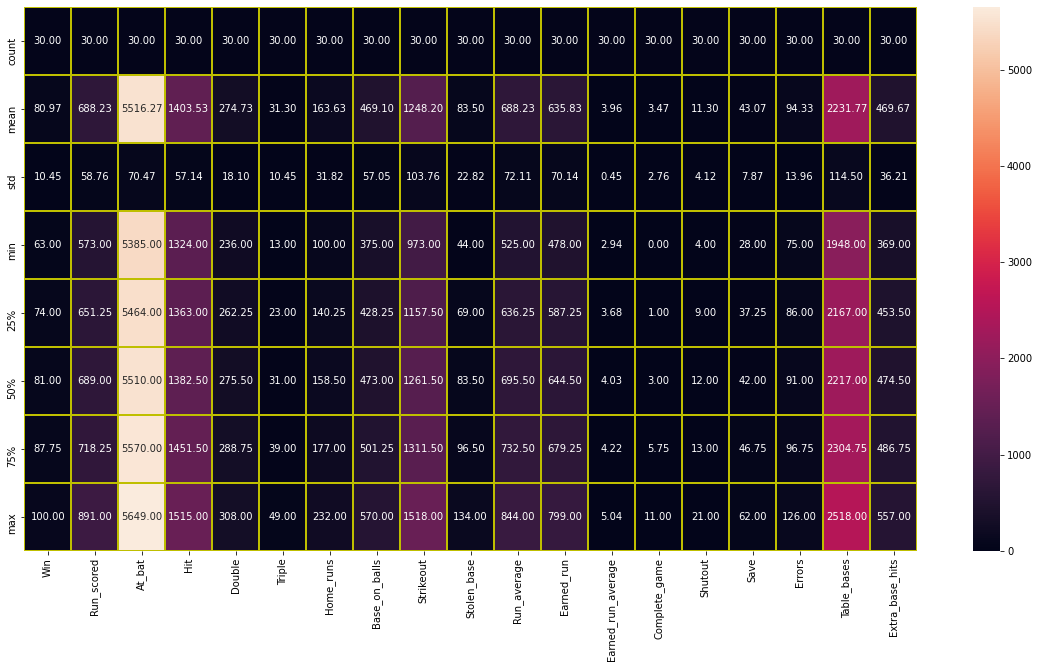

In [35]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.describe(), annot = True, linewidth = 0.05, linecolor = 'y', fmt = "0.2f")

In [36]:
# As i have observed for max columns, there is not much difference between 50 percentile and mean value
# which telling that, maximum columns are almost normally distributed
# Sttolen_base column is highly spreaded
# Win column which is target column showing max value 100 , and its telling that, we can consider this as percentage also

## Checking impact of features on target variable('Win')

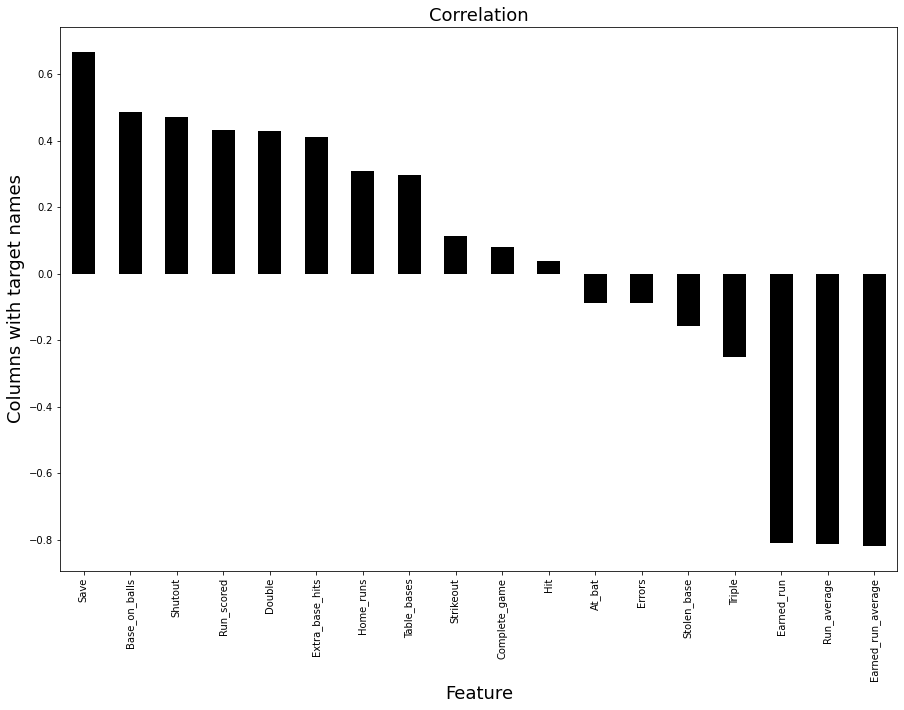

In [37]:
plt.figure(figsize = (15, 10))
df.corr()['Win'].sort_values(ascending = False).drop(['Win']).plot(kind = 'bar', color = 'black')
plt.xlabel( 'Feature', fontsize = 18)
plt.ylabel( 'Columns with target names', fontsize = 18)
plt.title ('Correlation', fontsize = 18)
plt.show()

In [38]:
# Save, Base_on_balls, Shutout, Run_scored, Double, Extra_base_hits, Home_runs, Table_bases, strikeout, complete_game and Hit
# these columns are postively contributing to predict target

#  At_bat, Errors, Stolen_base, Triple, Earned_run, Run_average and Earned_run_average are negatively contributing to
# predict target

# Hit and At_bat columns are not contributing much toward target variable
# Save column is highly positively  contributing toward variable
# and Earned_run, Run_average, _earned_run_average columns are highly negatively contributing towards target variable (win)

In [39]:
df.shape  
# (30, 19)

(30, 19)

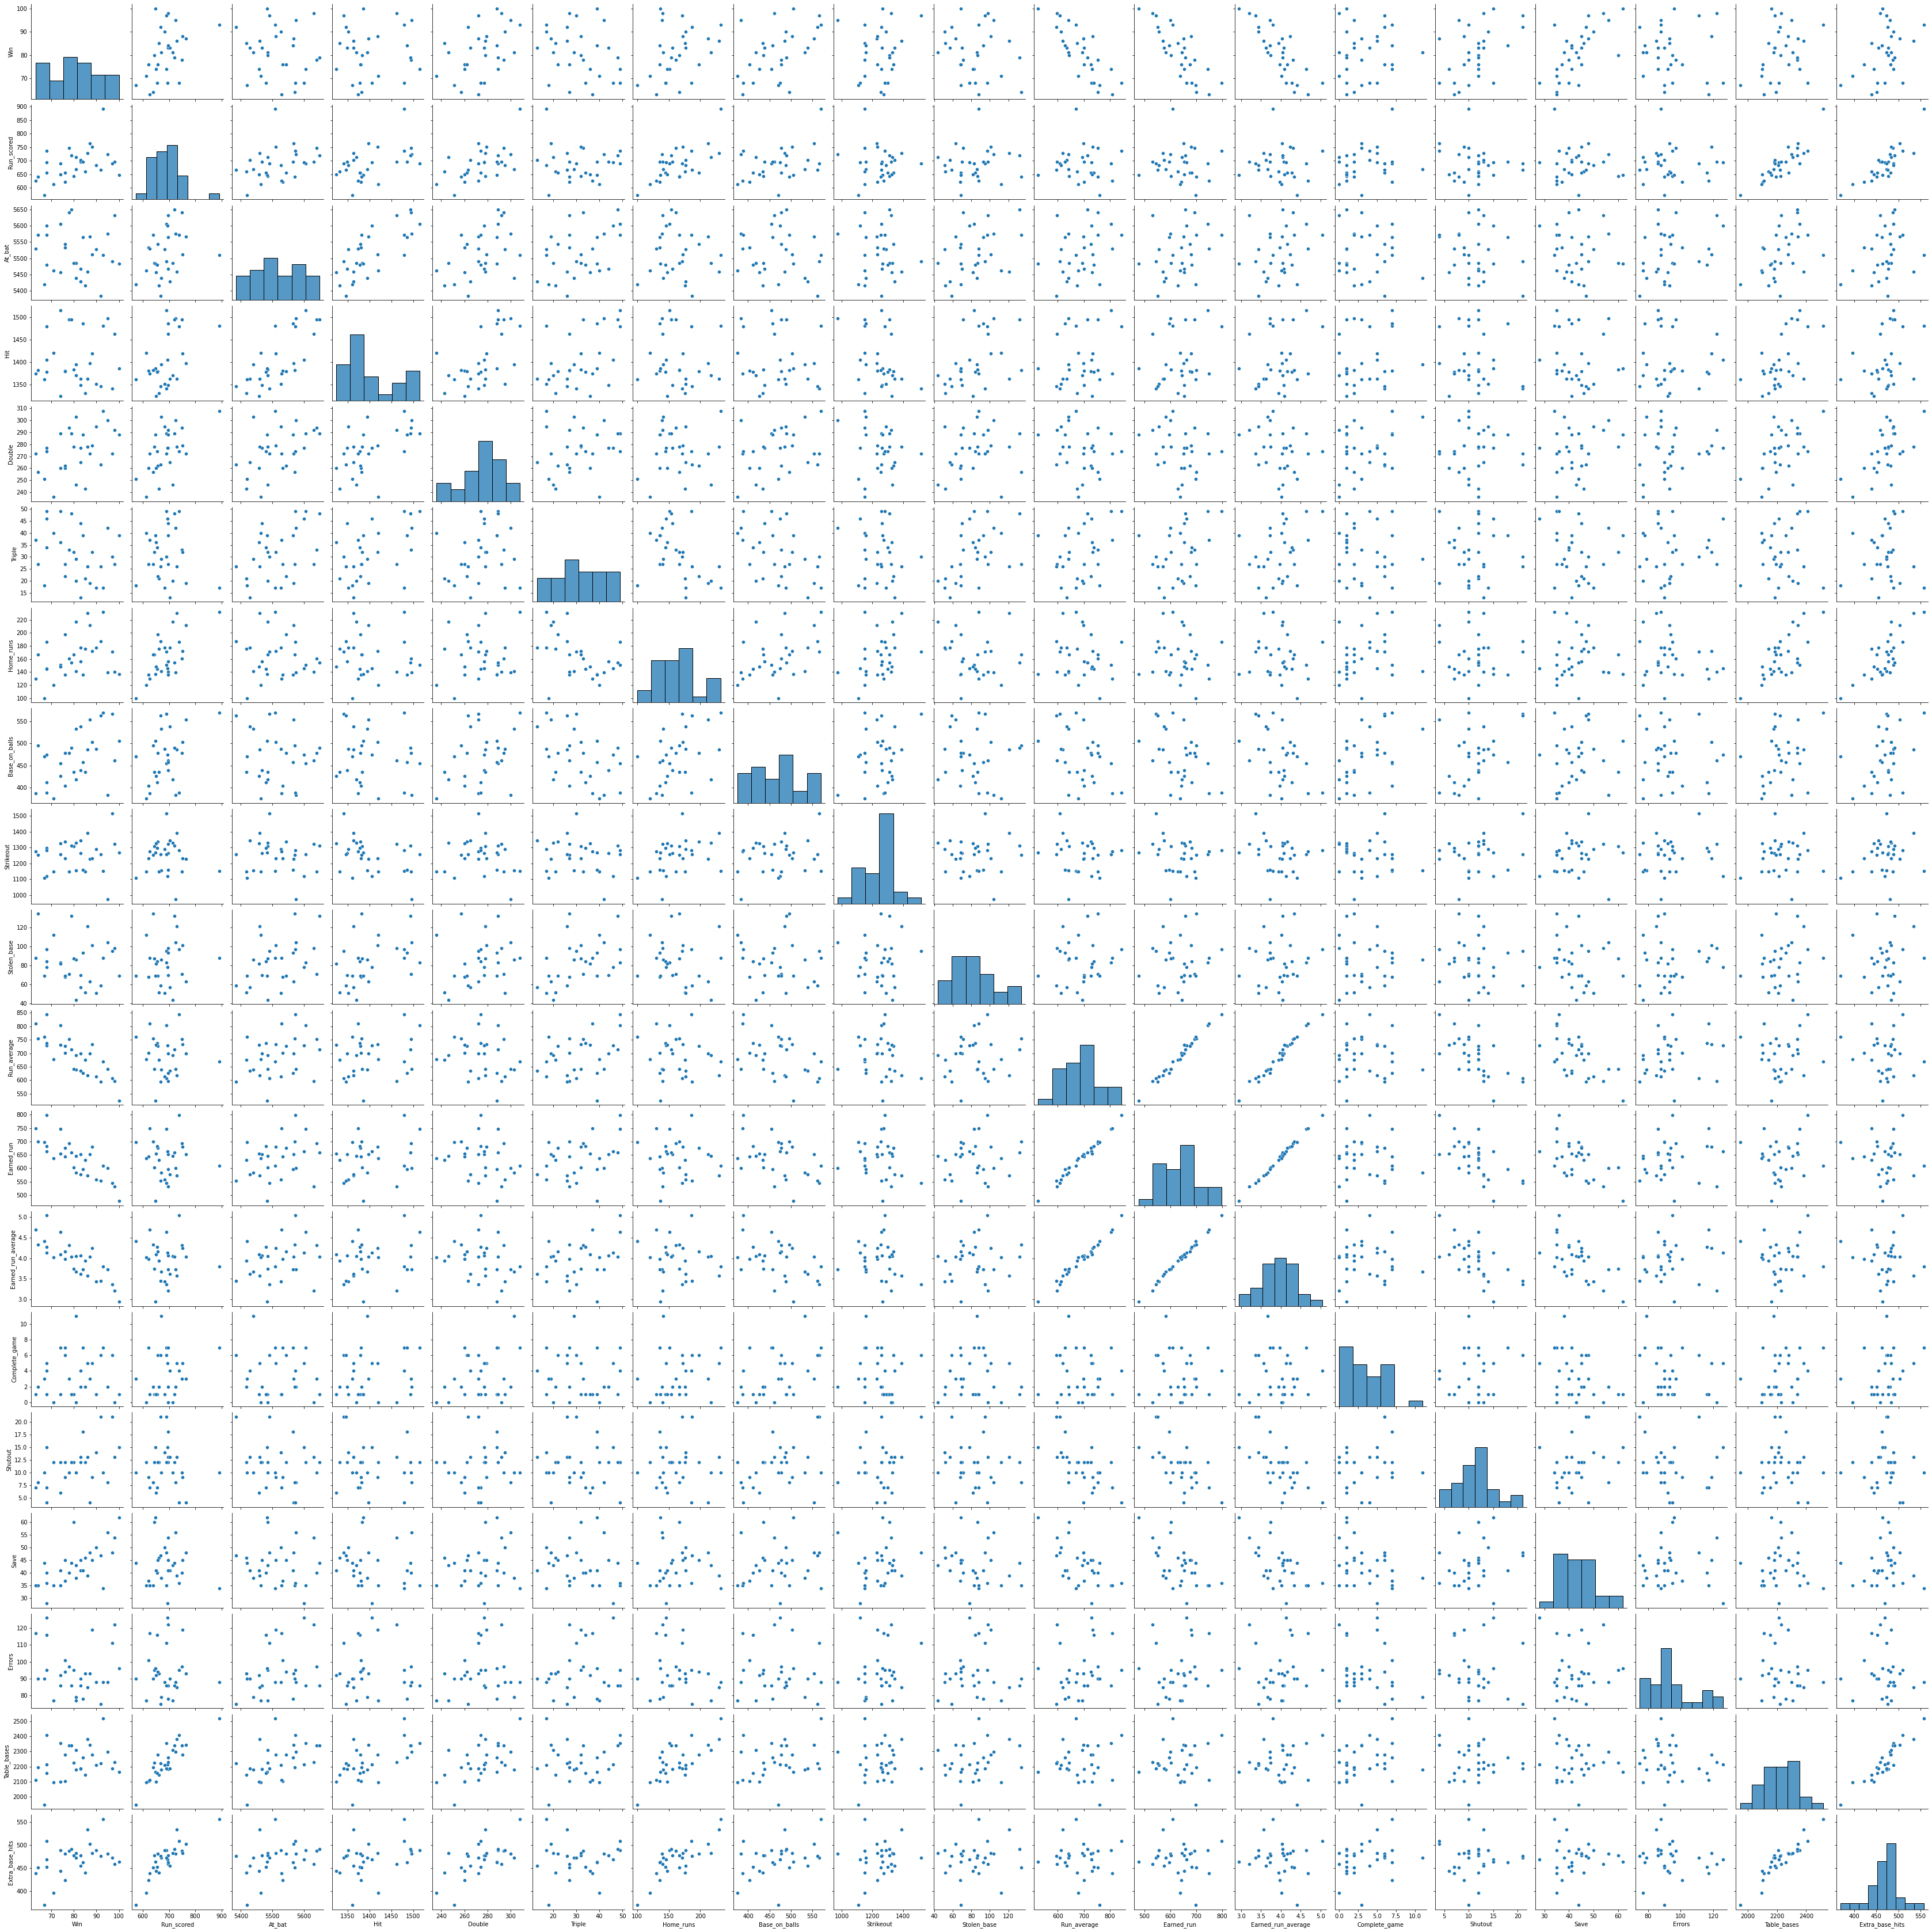

In [40]:
sns.pairplot(df)  # Pairplot to understand pattern of data

## Removing Outliers

#### Using zscore

In [41]:
from scipy.stats import zscore

In [42]:
z = np.abs(zscore(df))                  # Zscore operation
df_z = df[ (z < 3).all(axis = 1) ]      # taking value which are showing z < 3

In [43]:
df_z.shape   # (29, 19)

(29, 19)

In [44]:
# Predicting data loss
(df.shape[0] - df_z.shape[0]) / df.shape[0] *100  


# 3.3333333333333335
# Only 3 percent error loss we are facing using this method

3.3333333333333335

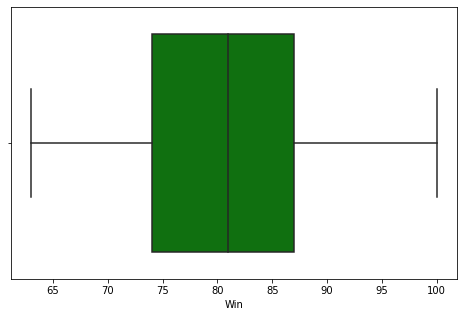

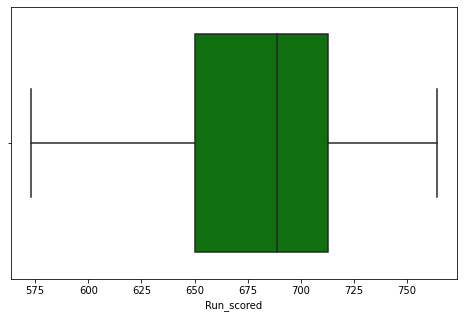

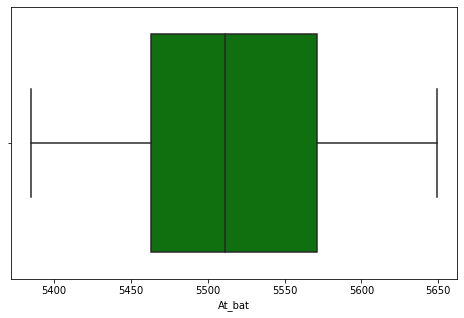

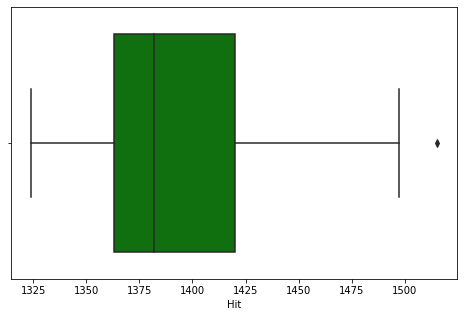

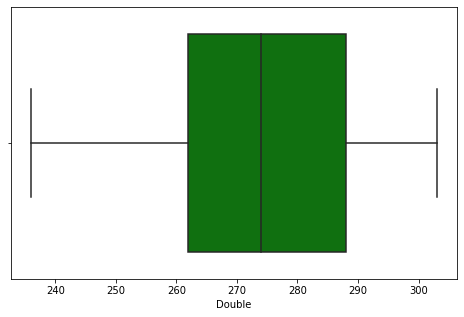

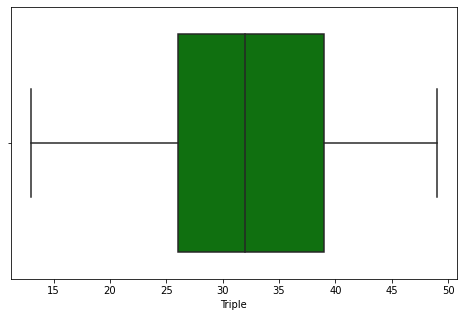

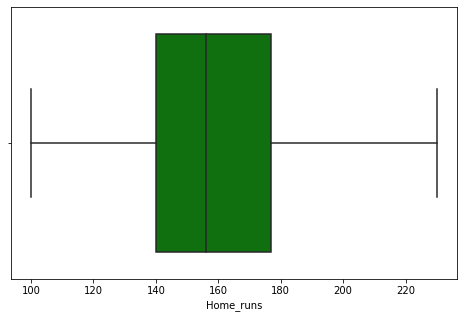

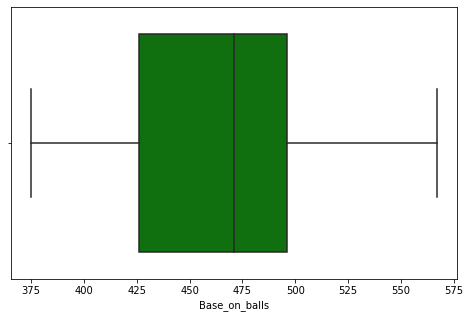

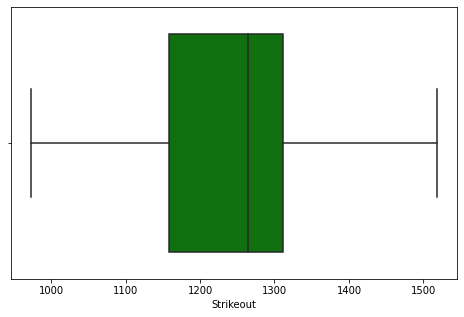

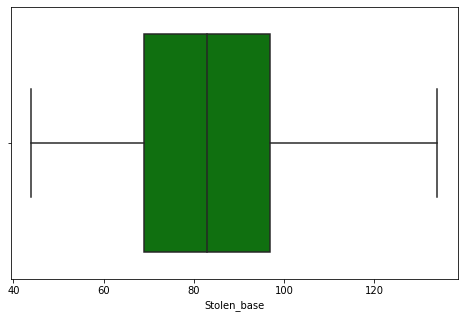

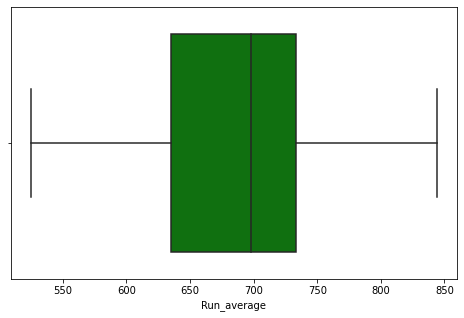

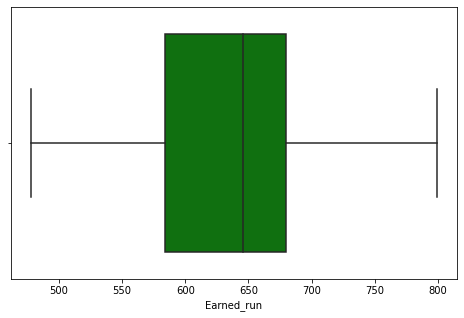

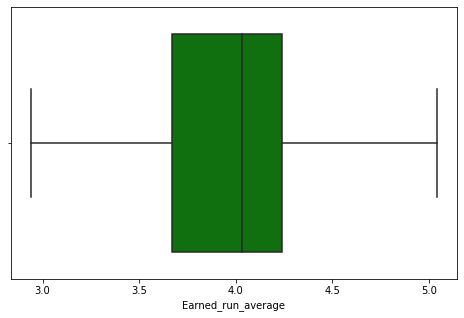

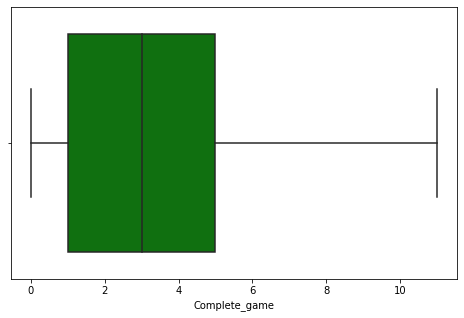

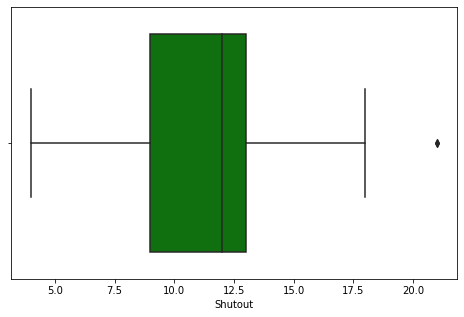

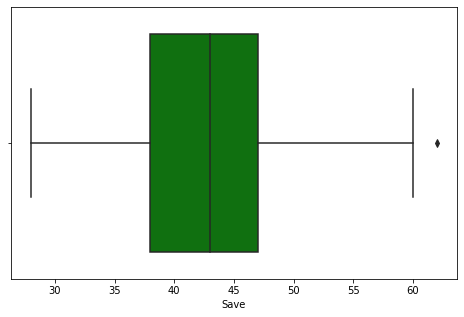

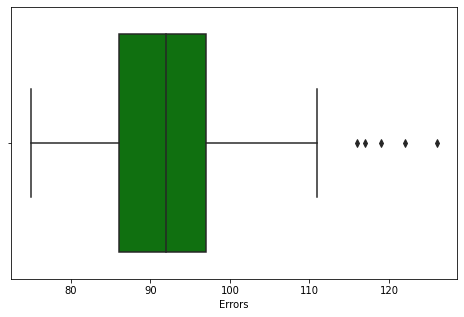

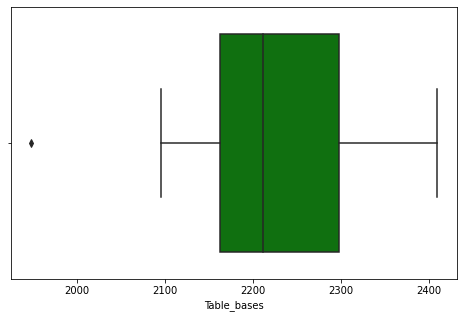

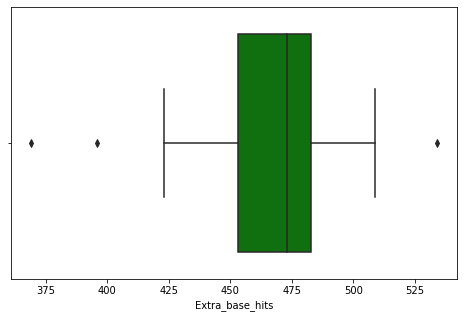

In [45]:
for i in df.columns:
    plt.figure(figsize = (8, 5))
    sns.boxplot(df_z[i], color = 'g')
    
# Complete outliers are not remove from these mentioned columns Hit , shutout, save, Errors, Table_bases and Extra_base_hits

#### Using IQR Technique

In [46]:
Q1 = df.quantile(0.25)    # 25 percentile
Q3 = df.quantile(0.75)    # 75 percentile
IQR = Q3 - Q1              # inter quartile 

In [47]:
df_IQR = df[ ~( (df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR )) ).any(axis = 1) ]  # operation to remove outliers by IQR
df_IQR.shape

# (18, 19)

(18, 19)

In [48]:
# data loss percent
(df.shape[0] -  df_IQR.shape[0] ) / df.shape[0] * 100  

# 40. percent data loss we are facing through this IQR method, 
# therefore, we will apply only zscore to our database

40.0

In [49]:
# This IQR technique is giving data loss in so high percentage
# therefore we will use zscore, which is descreasing outlier and giving only 3 percent data loss 

#### Applying zsocre technique to the original dataset

In [50]:
z = np.abs(zscore(df))          # zscore operation
df = df[(z<3).all(axis = 1)]    # taking all value which are having z < 3

In [51]:
df.shape

# (29, 19)

(29, 19)

In [52]:
df.head()  # first 5 rows

Win  Run_scored  At_bat     Hit  Double  Triple  Home_runs  Base_on_balls  \
0  95.0       724.0  5575.0  1497.0   300.0    42.0      139.0          383.0   
1  83.0       696.0  5467.0  1349.0   277.0    44.0      156.0          439.0   
2  81.0       669.0  5439.0  1395.0   303.0    29.0      141.0          533.0   
3  76.0       622.0  5533.0  1381.0   260.0    27.0      136.0          404.0   
4  74.0       689.0  5605.0  1515.0   289.0    49.0      151.0          455.0   

   Strikeout  Stolen_base  Run_average  Earned_run  Earned_run_average  \
0      973.0        104.0        641.0       601.0                3.73   
1     1264.0         70.0        700.0       653.0                4.07   
2     1157.0         86.0        640.0       584.0                3.67   
3     1231.0         68.0        701.0       643.0                3.98   
4     1259.0         83.0        803.0       746.0                4.64   

   Complete_game  Shutout  Save  Errors  Table_bases  Extra_base_hits  
0            2.0      8.0  56.0    88.0       2298.0            481.0  
1            2.0     12.0  45.0    86.0       2182.0            477.0  
2           11.0     10.0  38.0    79.0       2179.0            473.0  
3            7.0      9.0  37.0   101.0       2103.0            423.0  
4            7.0     12.0  35.0    86.0       2355.0            489.0

## Seperating dataset into x and y form

In [53]:
x = df.drop(columns = ['Win'])   # Drop win column in x (feature dataset)
y = df['Win']                     # Target variable

print('Shape of x: ', x.shape)
print('Shape of y: ', y.shape)

# Shape of x:  (29, 18)
# Shape of y:  (29,)

Shape of x:  (29, 18)
Shape of y:  (29,)


## Removing skewness

In [54]:
x.skew()

# Run_scored           -0.215364
# At_bat                0.169573
# Hit                   0.783772
# Double               -0.335304
# Triple                0.090124
# Home_runs             0.450862
# Base_on_balls         0.151193
# Strikeout            -0.233815
# Stolen_base           0.494966
# Run_average           0.018155
# Earned_run            0.018461
# Earned_run_average    0.016693
# Complete_game         0.854980
# Shutout               0.526943
# Save                  0.627480
# Errors                0.840271
# Table_bases          -0.321355
# Extra_base_hits      -1.013675

Run_scored           -0.215364
At_bat                0.169573
Hit                   0.783772
Double               -0.335304
Triple                0.090124
Home_runs             0.450862
Base_on_balls         0.151193
Strikeout            -0.233815
Stolen_base           0.494966
Run_average           0.018155
Earned_run            0.018461
Earned_run_average    0.016693
Complete_game         0.854980
Shutout               0.526943
Save                  0.627480
Errors                0.840271
Table_bases          -0.321355
Extra_base_hits      -1.013675
dtype: float64

In [55]:
# ['Hit', 'Complete_game' , 'Shutout', 'Save', 'Errors', 'Extra_base_hits'] 
# These columns are showing skewness which is not in acceptable range

In [56]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
from scipy import stats

In [57]:
# x[skewed_col] = pt.fit_transform(x[skewed_col])
# Applying to whole dataset, that will be good for our model building as tested from multiple trail by me
x_pt = pt.fit_transform(x)
x = pd.DataFrame(x_pt, columns = x.columns)

In [58]:
x.skew()

# Run_scored           -0.024842
# At_bat                0.000000
# Hit                   0.000000
# Double               -0.052793
# Triple               -0.075139
# Home_runs             0.000448
# Base_on_balls        -0.008572
# Strikeout             0.051530
# Stolen_base          -0.009570
# Run_average          -0.011974
# Earned_run           -0.004988
# Earned_run_average   -0.000401
# Complete_game        -0.045947
# Shutout               0.000529
# Save                 -0.000925
# Errors                0.065585
# Table_bases          -0.010187
# Extra_base_hits       0.076311

# At_bat and Hit columns are contributing so less to predict y
# we can delete this column also

Run_scored           -0.024842
At_bat                0.000000
Hit                   0.000000
Double               -0.052793
Triple               -0.075139
Home_runs             0.000448
Base_on_balls        -0.008572
Strikeout             0.051530
Stolen_base          -0.009570
Run_average          -0.011974
Earned_run           -0.004988
Earned_run_average   -0.000401
Complete_game        -0.045947
Shutout               0.000529
Save                 -0.000925
Errors                0.065585
Table_bases          -0.010187
Extra_base_hits       0.076311
dtype: float64

## Checking Multicolinearity 

##### Using VIF technique

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
# Function to calculate VIF value for each feature
def cal_vif(data):   
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return (vif)

<AxesSubplot:>

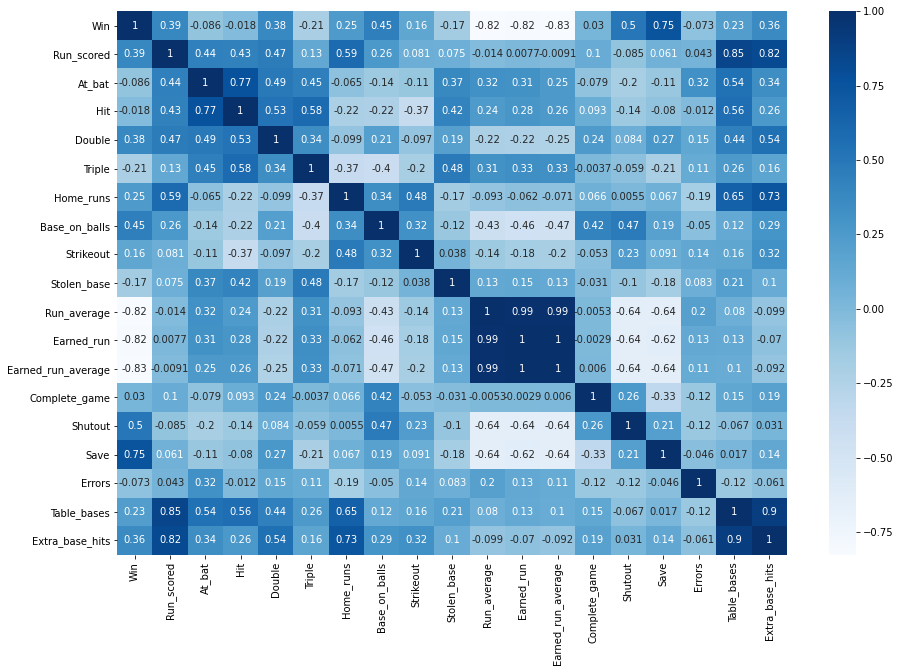

In [61]:
plt.figure(figsize = (15, 10))  
sns.heatmap(df.corr(), cmap ='Blues', annot = True)  
# This heatmap is just for reference

In [62]:
# Run_average and Earned_run columns are highlt corelated with each other
# Both columns contributing 0.99 towards y (win) variable, therefore we can delete any one of them

In [63]:
cal_vif(x)

# 9	Run_average	206.681220
# 10	Earned_run	898.450248
# 11	Earned_run_average	500.579081

# 16	Table_bases	17.773847
# 17	Extra_base_hits	23.672662

Features         VIF
0           Run_scored    6.647269
1               At_bat         NaN
2                  Hit         NaN
3               Double    7.010145
4               Triple    3.497016
5            Home_runs   19.629066
6        Base_on_balls    3.390773
7            Strikeout    2.983700
8          Stolen_base    2.352471
9          Run_average  206.681220
10          Earned_run  898.450248
11  Earned_run_average  500.579081
12       Complete_game    2.189517
13             Shutout    3.401516
14                Save    3.488771
15              Errors    2.079401
16         Table_bases   17.773847
17     Extra_base_hits   23.672662

In [64]:
# Earned_run and Earned_run_average is higly correlated with each other, 
# Earned_run(-0.82) contribution towards y  or target
# Earned_run_average (-0.83) contribution towards y or target
# Hence, Earned_run_average is less contributing as compare to Earned run, therefore we will delete Earned run avg column
x.shape

# (29, 18)

(29, 18)

In [65]:
x.drop(columns = ['Earned_run_average'], inplace = True)
x.shape

# (29, 17)

(29, 17)

In [66]:
cal_vif(x)

# 	Features	VIF
# 0	Run_scored	5.556785
# 1	At_bat	NaN
# 2	Hit	NaN
# 3	Double	6.234341
# 4	Triple	3.439875
# 5	Home_runs	16.785049
# 6	Base_on_balls	3.296205
# 7	Strikeout	2.911883
# 8	Stolen_base	2.151002
# 9	Run_average	181.542941
# 10	Earned_run	178.122861
# 11	Complete_game	2.129070
# 12	Shutout	3.274871
# 13	Save	3.018051
# 14	Errors	1.848044
# 15	Table_bases	13.174790
# 16	Extra_base_hits	18.460985


Features         VIF
0        Run_scored    5.556785
1            At_bat         NaN
2               Hit         NaN
3            Double    6.234341
4            Triple    3.439875
5         Home_runs   16.785049
6     Base_on_balls    3.296205
7         Strikeout    2.911883
8       Stolen_base    2.151002
9       Run_average  181.542941
10       Earned_run  178.122861
11    Complete_game    2.129070
12          Shutout    3.274871
13             Save    3.018051
14           Errors    1.848044
15      Table_bases   13.174790
16  Extra_base_hits   18.460985

In [67]:
# Run_average and Earned_run_average are hightly correlated with each other
# Run_average is contributing 0.82 and Earned_run_average is contributing 0.83 towards target variable (Win)
# hence, as Run_average is contributing less as compare to Earned_run_average
# Run_average column is required to delete

# As we can see in the above heatmap
# Run_average and Earned_run are highly correlated
# And both features are contributing equally towards target
# Therefore, we can delete any one of both

In [68]:
x.drop(columns = ['Run_average'], inplace = True)  # droping 'Run_average' column

In [69]:
cal_vif(x)

# 	Features	VIF
# 0	Run_scored	5.510102
# 1	At_bat	NaN
# 2	Hit	NaN
# 3	Double	6.003101
# 4	Triple	3.400253
# 5	Home_runs	16.225532
# 6	Base_on_balls	2.899947
# 7	Strikeout	2.263609
# 8	Stolen_base	1.993830
# 9	Earned_run	4.881308
# 10	Complete_game	1.987514
# 11	Shutout	3.059278
# 12	Save	2.185510
# 13	Errors	1.582523
# 14	Table_bases	12.895338
# 15	Extra_base_hits	18.455969

Features        VIF
0        Run_scored   5.510102
1            At_bat        NaN
2               Hit        NaN
3            Double   6.003101
4            Triple   3.400253
5         Home_runs  16.225532
6     Base_on_balls   2.899947
7         Strikeout   2.263609
8       Stolen_base   1.993830
9        Earned_run   4.881308
10    Complete_game   1.987514
11          Shutout   3.059278
12             Save   2.185510
13           Errors   1.582523
14      Table_bases  12.895338
15  Extra_base_hits  18.455969

In [70]:
# Now, Home_runs and Extra_base_hits columns are showing Multicollinearity
# Home_runs column is contributing towards target with value 0.25
# Extra_base_hits columns is contributing towards target with value 0.36
# Hence, Extra_base_hits column is contributing more as compare to Home_run, therefore we can remove Home_runs

In [71]:
x.drop(columns = ['Home_runs'], inplace = True)

In [72]:
cal_vif(x)

# 	Features	VIF
# 0	Run_scored	5.479550
# 1	At_bat	NaN
# 2	Hit	NaN
# 3	Double	2.509401
# 4	Triple	2.715485
# 5	Base_on_balls	2.880420
# 6	Strikeout	2.108107
# 7	Stolen_base	1.722515
# 8	Earned_run	4.671855
# 9	Complete_game	1.987513
# 10	Shutout	3.028415
# 11	Save	2.177033
# 12	Errors	1.564884
# 13	Table_bases	12.138420
# 14	Extra_base_hits	9.240454

Features        VIF
0        Run_scored   5.479550
1            At_bat        NaN
2               Hit        NaN
3            Double   2.509401
4            Triple   2.715485
5     Base_on_balls   2.880420
6         Strikeout   2.108107
7       Stolen_base   1.722515
8        Earned_run   4.671855
9     Complete_game   1.987513
10          Shutout   3.028415
11             Save   2.177033
12           Errors   1.564884
13      Table_bases  12.138420
14  Extra_base_hits   9.240454

In [73]:
# Now, All columns VIF values are in under acceptable range
# As i know, NaN getting because data is too small for model building

## Standard Scalling

In [74]:
x.head()

Run_scored  At_bat  Hit    Double    Triple  Base_on_balls  Strikeout  \
0    0.962544     0.0  0.0  1.685188  1.006150      -1.605198  -2.550612   
1    0.298863     0.0  0.0  0.138198  1.185227      -0.462096   0.093683   
2   -0.312105     0.0  0.0  1.907385 -0.228819       1.232098  -0.935611   
3   -1.308298     0.0  0.0 -0.837665 -0.432228      -1.162721  -0.230683   
4    0.137737     0.0  0.0  0.911435  1.622636      -0.155686   0.044143   

   Stolen_base  Earned_run  Complete_game   Shutout      Save    Errors  \
0     0.936132   -0.508052      -0.307098 -0.787002  1.532753 -0.348265   
1    -0.516377    0.235800      -0.307098  0.236737  0.312020 -0.540820   
2     0.225038   -0.752214       2.011315 -0.252844 -0.664137 -1.326125   
3    -0.618422    0.093091       1.264463 -0.513555 -0.820689  0.650818   
4     0.095038    1.555853       1.264463  0.236737 -1.149165 -0.540820   

   Table_bases  Extra_base_hits  
0     0.740156         0.380105  
1    -0.442263         0.234751  
2    -0.471049         0.093565  
3    -1.171218        -1.353337  
4     1.372339         0.683666

In [75]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [76]:
x_scaler = ss.fit_transform(x)
x = pd.DataFrame(x_scaler, columns = x.columns)

In [77]:
x.shape   
# (29, 15)

(29, 15)

In [78]:
x.head()

Run_scored  At_bat  Hit    Double    Triple  Base_on_balls  Strikeout  \
0    0.962544     0.0  0.0  1.685188  1.006150      -1.605198  -2.550612   
1    0.298863     0.0  0.0  0.138198  1.185227      -0.462096   0.093683   
2   -0.312105     0.0  0.0  1.907385 -0.228819       1.232098  -0.935611   
3   -1.308298     0.0  0.0 -0.837665 -0.432228      -1.162721  -0.230683   
4    0.137737     0.0  0.0  0.911435  1.622636      -0.155686   0.044143   

   Stolen_base  Earned_run  Complete_game   Shutout      Save    Errors  \
0     0.936132   -0.508052      -0.307098 -0.787002  1.532753 -0.348265   
1    -0.516377    0.235800      -0.307098  0.236737  0.312020 -0.540820   
2     0.225038   -0.752214       2.011315 -0.252844 -0.664137 -1.326125   
3    -0.618422    0.093091       1.264463 -0.513555 -0.820689  0.650818   
4     0.095038    1.555853       1.264463  0.236737 -1.149165 -0.540820   

   Table_bases  Extra_base_hits  
0     0.740156         0.380105  
1    -0.442263         0.234751  
2    -0.471049         0.093565  
3    -1.171218        -1.353337  
4     1.372339         0.683666

## Machine Learning

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [80]:
def best_randomstate (model, x, y):
    best_fit = []
    for i in range(0, 200 ) :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = r2_score(m_predict_train, y_train)
        testing = r2_score(m_predict_test, y_test)

    #     print('At random state', i, 'the training accuracy is :-', training2)
    #     print('At random state', i, 'the testing accuracy is :-', testing2) 
    #     print('\n')

        if np.abs(round(training, 2) - round(testing, 2)) < 0.05:
            best_fit.append(i)
    return (best_fit)

In [81]:
def random_state(model, x, y, randomstate_lst):    
    for i in randomstate_lst :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        r_m = model()
        r_m.fit(x_train, y_train)
        r_m_predict_train = r_m.predict(x_train)
        r_m_predict_test = r_m.predict(x_test)

        training = r2_score(r_m_predict_train, y_train)
        testing = r2_score(r_m_predict_test, y_test)

        print('At random state', i, 'the training accuracy is :-', training)
        print('At random state', i, 'the testing accuracy is :-', testing) 
        print('__________________________________________________________________________')

In [82]:
def apply_model(model, x, y, best_fit):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_fit)
    algo = model()
    algo.fit(x_train, y_train)
    algo_pred = algo.predict(x_test)
    algo_pred_train = algo.predict(x_train)

    Train_accuracy1 = r2_score(algo_pred_train, y_train)
    Test_accuracy1 = r2_score(algo_pred, y_test) 
    print('Training accuracy: ', Train_accuracy1)
    print('Testing accuracy: ', Test_accuracy1)
    print('______________________________________________')
    print('Mean squared error: ', mean_squared_error(algo_pred, y_test) )
    print('Mean absolute error: ', mean_absolute_error(algo_pred, y_test) )

### LinearRegression

In [83]:
best_randomstate(LinearRegression, x, y) 

# No best_randomstate found, mean this model is not giving best model

[]

In [84]:
max_acc1 = 0
random_s1 = 0

for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model1 = LinearRegression()
    model1.fit(x_train, y_train)
    model1_predict = model1.predict(x_test)
    acc = r2_score(model1_predict, y_test)
    
    if acc > max_acc1:
        max_acc1 = acc
        random_s1 = i
print('Model is giving best accurancy', max_acc1, 'on random state of', random_s1 )

# Model is giving best accurancy 0.878133025513002 on random state of 136

Model is giving best accurancy 0.878133025513002 on random state of 136


In [85]:
apply_model(LinearRegression, x, y, 136)

# Training accuracy:  0.9560606632538516
# Testing accuracy:  0.878133025513002
# ______________________________________________
# Mean squared error:  15.171455429655351
# Mean absolute error:  2.7448845194890765

Training accuracy:  0.9560606632538516
Testing accuracy:  0.878133025513002
______________________________________________
Mean squared error:  15.171455429655351
Mean absolute error:  2.7448845194890765


In [86]:
# Training accuracy is greater than Testing accuracy, hence it is giving over fitted model

#### Cross Validation for LinearRegression

In [87]:
lr = LinearRegression()
for val in range (3, 8):
    cv = cross_val_score(lr, x, y, cv = val).mean()
    print('cv score is', cv, 'at cross fold value', val)
# Maximum CV is at fold value 3 but model is not giving training accuracy equal to testing accuracy

# cv score is 0.4150319656875518 at cross fold value 3
# cv score is 0.3819524127482152 at cross fold value 4
# cv score is 0.3751034702774777 at cross fold value 5
# cv score is 0.34043010521511463 at cross fold value 6
# cv score is 0.31519704703796997 at cross fold value 7

cv score is 0.4150319656875518 at cross fold value 3
cv score is 0.3819524127482152 at cross fold value 4
cv score is 0.3751034702774777 at cross fold value 5
cv score is 0.34043010521511463 at cross fold value 6
cv score is 0.31519704703796997 at cross fold value 7


In [88]:
# As this model is giving over fitted model, therefore no need to check further operation

### Model 2  Lasso

In [89]:
r_state2= best_randomstate(Lasso, x, y)
print(r_state2)

# [8, 15, 17, 19, 22, 33, 53, 57, 68, 70, 73, 80, 90, 114, 132, 137, 143, 159, 161, 168, 170, 181, 182, 194, 199]

[8, 15, 17, 19, 22, 33, 53, 57, 68, 70, 73, 80, 90, 114, 132, 137, 143, 159, 161, 168, 170, 181, 182, 194, 199]


In [90]:
random_state(Lasso, x, y, r_state2)

At random state 8 the training accuracy is :- 0.8284824098249198
At random state 8 the testing accuracy is :- 0.8529481482469402
__________________________________________________________________________
At random state 15 the training accuracy is :- 0.7626903485011414
At random state 15 the testing accuracy is :- 0.719267885466719
__________________________________________________________________________
At random state 17 the training accuracy is :- 0.7727117273595971
At random state 17 the testing accuracy is :- 0.7898370785625095
__________________________________________________________________________
At random state 19 the training accuracy is :- 0.8343098501242796
At random state 19 the testing accuracy is :- 0.7882875832043813
__________________________________________________________________________
At random state 22 the training accuracy is :- 0.7904434195688264
At random state 22 the testing accuracy is :- 0.7529603449603259
________________________________________________

In [91]:
# From above output we found model is performing best at random_state 90
apply_model(Lasso, x, y, 90)


# Training accuracy:  0.8455212224975237
# Testing accuracy:  0.847581180670081
# ______________________________________________
# Mean squared error:  7.096801633875315
# Mean absolute error:  1.9570173659021717

Training accuracy:  0.8455212224975237
Testing accuracy:  0.847581180670081
______________________________________________
Mean squared error:  7.096801633875315
Mean absolute error:  1.9570173659021717


#### Cross val Score for Lasso

In [92]:
for val in range(2, 8):    
    cross = cross_val_score(Lasso(), x, y, cv = val).mean()
    print('Cross value:', cross,'at fold', val)
    
#     Cross value: 0.6908610075458848 at fold 2
# Cross value: 0.6799193623264707 at fold 3
# Cross value: 0.7646329925073372 at fold 4
# Cross value: 0.5241344433357891 at fold 5
# Cross value: 0.6122122502564503 at fold 6
# Cross value: 0.47441155288169906 at fold 7

Cross value: 0.6908610075458848 at fold 2
Cross value: 0.6799193623264707 at fold 3
Cross value: 0.7646329925073372 at fold 4
Cross value: 0.5241344433357891 at fold 5
Cross value: 0.6122122502564503 at fold 6
Cross value: 0.47441155288169906 at fold 7


In [93]:
# As we can see this model is giving maxium value (0.76) at fold value 4
# Testing and training accuracy is same

### Model 3:  Ridge

In [94]:
r_state3= best_randomstate(Ridge, x, y)
print(r_state3)

# [1, 44, 159]

[1, 44, 159]


In [95]:
random_state(Ridge, x, y, r_state3)


# At random state 1 the training accuracy is :- 0.9295460266888971
# At random state 1 the testing accuracy is :- 0.9209984776316456
# __________________________________________________________________________
# At random state 44 the training accuracy is :- 0.9173083480122945
# At random state 44 the testing accuracy is :- 0.9151661157274446
# __________________________________________________________________________
# At random state 159 the training accuracy is :- 0.932346091083022
# At random state 159 the testing accuracy is :- 0.8869636385906899
# __________________________________________________________________________

At random state 1 the training accuracy is :- 0.9295460266888971
At random state 1 the testing accuracy is :- 0.9209984776316456
__________________________________________________________________________
At random state 44 the training accuracy is :- 0.9173083480122945
At random state 44 the testing accuracy is :- 0.9151661157274446
__________________________________________________________________________
At random state 159 the training accuracy is :- 0.932346091083022
At random state 159 the testing accuracy is :- 0.8869636385906899
__________________________________________________________________________


In [96]:
# From above output we found model is performing best at random_state 90
apply_model(Ridge, x, y, 44)

# Training accuracy:  0.9173083480122945
# Testing accuracy:  0.9151661157274446
# ______________________________________________
# Mean squared error:  9.018850270455097
# Mean absolute error:  2.499935023259214

Training accuracy:  0.9173083480122945
Testing accuracy:  0.9151661157274446
______________________________________________
Mean squared error:  9.018850270455097
Mean absolute error:  2.499935023259214


#### Cross value score for Ridge Model

In [97]:
for val in range(2, 8):    
    cross = cross_val_score(Ridge(), x, y, cv = val).mean()
    print('Cross value:', cross,'at fold', val)
    
    
# Cross value: 0.6760890696148285 at fold 2
# Cross value: 0.519654269605068 at fold 3
# Cross value: 0.6261955349520734 at fold 4
# Cross value: 0.4426776158954679 at fold 5
# Cross value: 0.4165575626877362 at fold 6
# Cross value: 0.35653627158326845 at fold 7

Cross value: 0.6760890696148285 at fold 2
Cross value: 0.519654269605068 at fold 3
Cross value: 0.6261955349520734 at fold 4
Cross value: 0.4426776158954679 at fold 5
Cross value: 0.4165575626877362 at fold 6
Cross value: 0.35653627158326845 at fold 7


In [98]:
# CV is giving maximum value at fold 2

## Model 4: ElasticNet

In [99]:
r_state4= best_randomstate(ElasticNet, x, y)
print(r_state4)

# [57, 80, 89, 103, 118, 128, 129, 194]

[57, 80, 89, 103, 118, 128, 129, 194]


In [100]:
random_state(ElasticNet, x, y, r_state4)

At random state 57 the training accuracy is :- 0.6587257047722811
At random state 57 the testing accuracy is :- 0.6411426090871166
__________________________________________________________________________
At random state 80 the training accuracy is :- 0.7212418013159934
At random state 80 the testing accuracy is :- 0.6751943612829735
__________________________________________________________________________
At random state 89 the training accuracy is :- 0.6762688929336572
At random state 89 the testing accuracy is :- 0.6593749553284547
__________________________________________________________________________
At random state 103 the training accuracy is :- 0.5972210963713176
At random state 103 the testing accuracy is :- 0.560239149193603
__________________________________________________________________________
At random state 118 the training accuracy is :- 0.7370525179396581
At random state 118 the testing accuracy is :- 0.7021118787948479
__________________________________________

In [101]:
# As we can see this model is giving best accuracy at 128 where testing accuracy is almost equal to training accuracy

In [102]:
# From above output we found model is performing best at random_state 128
apply_model(ElasticNet, x, y, 128)

# Training accuracy:  0.7038990707628712
# Testing accuracy:  0.6963680998940535
# ______________________________________________
# Mean squared error:  17.93058015787769
# Mean absolute error:  3.4817763470136214

Training accuracy:  0.7038990707628712
Testing accuracy:  0.6963680998940535
______________________________________________
Mean squared error:  17.93058015787769
Mean absolute error:  3.4817763470136214


### Cross Value Score for ElasticNet

In [103]:
for val in range(2, 8):    
    cross = cross_val_score(ElasticNet(), x, y, cv = val).mean()
    print('Cross value:', cross,'at fold', val)
    
    
#     Cross value: 0.510115546796184 at fold 2
# Cross value: 0.5020711097848046 at fold 3
# Cross value: 0.663454629419701 at fold 4
# Cross value: 0.34302635054891534 at fold 5
# Cross value: 0.4529257838922434 at fold 6
# Cross value: 0.3282188284282836 at fold 7

Cross value: 0.510115546796184 at fold 2
Cross value: 0.5020711097848046 at fold 3
Cross value: 0.663454629419701 at fold 4
Cross value: 0.34302635054891534 at fold 5
Cross value: 0.4529257838922434 at fold 6
Cross value: 0.3282188284282836 at fold 7


In [104]:
# Maximum cv value is 0.66345462 at fold value 4

### Observation from above applied ML Algorithms

In [105]:

# Model 					Accuracy			CV			    Difference
# LinearRegression			0.87813302			0.41503196		0.463101106	
# Lasso					    0.84758118			0.76463299		0.08294819		
# Ridge					    0.91516611			0.67608906		0.23907705		
# ElasticNet				0.69636809			0.66345462		0.03291347

# As we can see least difference we are getting from ElasticNet algorithm 
# Therefore, we will applied procedings to ElasticeNet algorithm

## Final Model

#### Ensemble Techniques for ElasticNet Algorithm

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
parameter = {'alpha':[0.01, 0.001, 0.05, 0.005, 0.5], 'l1_ratio' : [0.2, 0.3, 0.4, 0.5, 0.6],
             'fit_intercept' : [True, False], 'selection' : ['cyclic', 'random'],
             'positive': [True, False]  }

In [108]:
# As from above elastic performance, we found elastic model is giving maximum value at fold 4,
# Therefore we will pas cv = 4 in gcv instance creation
gcv = GridSearchCV(estimator = ElasticNet(), param_grid = parameter, cv = 4 )

In [109]:
gcv.fit(x_train, y_train)

# GridSearchCV(cv=4, estimator=ElasticNet(),
#              param_grid={'alpha': [0.01, 0.001, 0.05, 0.005, 0.5],
#                          'fit_intercept': [True, False],
#                          'l1_ratio': [0.2, 0.3, 0.4, 0.5, 0.6],
#                          'positive': [True, False],
#                          'selection': ['cyclic', 'random']})

GridSearchCV(cv=4, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.001, 0.05, 0.005, 0.5],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.2, 0.3, 0.4, 0.5, 0.6],
                         'positive': [True, False],
                         'selection': ['cyclic', 'random']})

In [110]:
gcv.best_params_

# {'alpha': 0.5,
#  'fit_intercept': True,
#  'l1_ratio': 0.6,
#  'positive': False,
#  'selection': 'cyclic'}

{'alpha': 0.5,
 'fit_intercept': True,
 'l1_ratio': 0.6,
 'positive': False,
 'selection': 'cyclic'}

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 129)

final_model = ElasticNet(alpha = 0.5, fit_intercept = True, l1_ratio = 0.6, positive = False, selection = 'cyclic')
final_model.fit(x_train, y_train)
final_pred = final_model.predict(x_test)
final_pred_train = final_model.predict(x_train)

final_train_accuracy = r2_score(final_pred_train, y_train)
final_test_accuracy = r2_score(final_pred, y_test)
print('Training accuracy: ', final_train_accuracy)
print('Testing accuracy: ', final_test_accuracy)
print('______________________________________________')
print('Mean squared error: ', mean_squared_error(final_pred, y_test) )
print('Mean absolute error: ', mean_absolute_error(final_pred, y_test) )


# Training accuracy:  0.8611233146923071
# Testing accuracy:  0.8543837640647964
# ______________________________________________
# Mean squared error:  8.012001895472267
# Mean absolute error:  2.0746085509493515

Training accuracy:  0.8611233146923071
Testing accuracy:  0.8543837640647964
______________________________________________
Mean squared error:  8.012001895472267
Mean absolute error:  2.0746085509493515


In [112]:
# As we have understood by above trail of model, ElasticNet Algorithm is giving maxium value at cross fold 4
# therefore, we are considering cv = 4
cross_val_score(final_model, x, y, cv = 4).mean()

# 0.7422416747956825

0.7422416747956825

In [ ]:
#                         						MSR

# LinearRegression   	             			15.1714
# Lasso			                     			07.0968
# Ridge			                     			02.4999
# Elastic			                			03.4817
# Elastic (After Hyper parameter tuning)     	02.0746  (Best model)


<AxesSubplot:title={'center':'Model Coefficients'}>

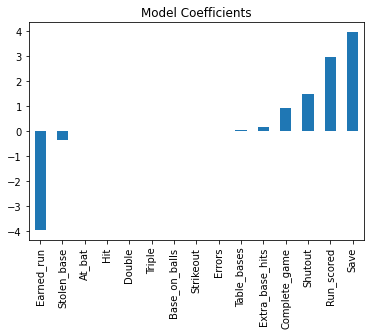

In [113]:
coef = pd.Series(final_model.coef_, x.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

## Performance Graph

Text(0.5, 1.0, 'ElasticNet Machin Learning Model')

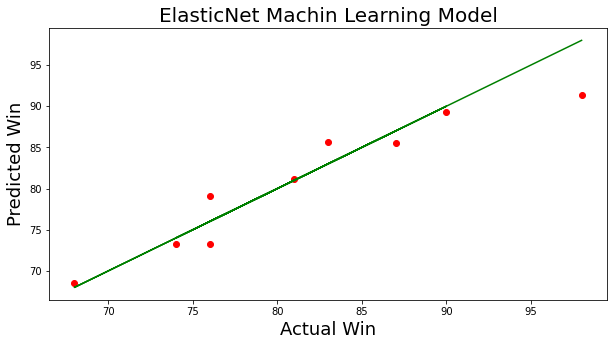

In [114]:
plt.figure(figsize = (10, 5))
plt.scatter(x = y_test, y = final_pred, color = 'r')
plt.plot(y_test, y_test, color = 'g')
plt.xlabel('Actual Win', fontsize= 18 )
plt.ylabel('Predicted Win', fontsize = 18)
plt.title('ElasticNet Machin Learning Model', fontsize = 20)

In [115]:
# As we gettin 85 % accuracy of model, therefore prediected values are little far from acutal values

## Deply Model

In [116]:
import pickle
filename = 'base_ball_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

## Loading Model

In [117]:
bass_ball_model =  pickle.load(open('base_ball_model.pkl', 'rb'))
result = bass_ball_model.score(x_test, y_test)
print(result)

# 0.893366389495029

0.893366389495029


## Conclusion

In [118]:
predicted_win = np.array(bass_ball_model.predict(x_test))
original_win = np.array(y_test)
# convert columns in to np.array 

In [119]:
print(predicted_win.shape)
print(original_win.shape)
print(x_test.shape)
print(y_test.shape)

# (9,)
# (9,)
# (9, 15)
# (9,)

(9,)
(9,)
(9, 15)
(9,)


### Creating dataframe for comparison of predicted and actual wins

In [120]:
df_compare = pd.DataFrame({'Original Win': original_win, 'Predicted Win': predicted_win}, index = range(len(original_win)))

In [121]:
df_compare['Predicted Win'] = df_compare['Predicted Win'].apply(lambda x : np.round(x,0))

# df_compare['Predicted Win'] = np.round( df_compare['Predicted Win'], 0)

In [122]:
df_compare

#     OriginalWin	     Predicted Win
# 0	98.0	            91.0
# 1	76.0	            73.0
# 2	68.0	            69.0
# 3	87.0	            86.0
# 4	76.0	            79.0
# 5	83.0	            86.0
# 6	90.0	            89.0
# 7	74.0	            73.0
# 8	81.0	            81.0

Original Win  Predicted Win
0          98.0           91.0
1          76.0           73.0
2          68.0           69.0
3          87.0           86.0
4          76.0           79.0
5          83.0           86.0
6          90.0           89.0
7          74.0           73.0
8          81.0           81.0